In [2]:
import numpy as np
import pandas as pd
import re

import matplotlib.pyplot as plt
import seaborn as sns

# **Acceso a Internet**

A continuación, cargamos, exploramos y analizamos los datasets proporcionados por [ENACOM](https://datosabiertos.enacom.gob.ar/dashboards/20000/acceso-a-internet/) y guardadas en la carpeta [Original datasets](https://github.com/PedroLiLL/Telecommunications-Data-Analysis/tree/main/Original%20datasets) correspondientes a la información del mercado, oferta, demanda y cobertura del servicio de internet (Primer Trimestre 2014 - Tercer Trimestre 2022)

### Datasets a utilizar
Considerando que la principal actividad de la empresa es brindar acceso a internet, se sugiere utilizar los siguientes datasets:

- **Penetración por hogares nacional de Internet fijo**  Este dataset contiene información sobre la cantidad de hogares que poseen acceso a internet fijo en todo el país y su evolución en el tiempo. Se complementa con el dataset *Penetración de Internet fijo (accesos por cada 100 hogares)*.

- **Total nacional de accesos a Internet fijo por banda ancha y banda angosta**  Este dataset permitirá a la empresa comprender la proporción de accesos a Internet fijo que se realizan a través de banda ancha y banda angosta. Esto puede ayudar a la empresa a comprender mejor las necesidades de sus clientes y a ofrecer servicios personalizados que satisfagan esas necesidades. Se complementa con el dataset *Accesos a banda ancha y banda angosta por provincia*.

- **Acceso a Internet fijo por tecnología**  Este dataset permitirá a la empresa comprender las preferencias de los clientes en cuanto a la tecnología utilizada para acceder a Internet fijo. Se puede relacionar con los datasets *Acceso a Internet fijo por tecnología y provincia* y *Accesos a banda ancha y banda angosta por provincia* . Esto puede ayudar a la empresa a perzonalizar sus ofertas de servicios.

- **Velocidad media de bajada de Internet fijo por provincia**  Este dataset permitirá a la empresa comprender la velocidad media de descarga del servicio de Internet fijo en diferentes provincias. Esto puede ayudar a la empresa a identificar áreas de mejora en la calidad del servicio y enfocar sus esfuerzos en esas áreas.

- **Accesos a Internet fijo por velocidad bajada y provincia**, **Acceso a Internet Fijo por rangos de velocidad de bajada y provincia**  Estos datasets permitirán a la empresa comprender la distribución de los accesos a Internet fijo por velocidad de descarga en diferentes provincias. Esto puede ayudar a la empresa a comprender mejor las necesidades de los clientes en cuanto a la velocidad de descarga y ofrecer planes de servicio personalizados que satisfagan esas necesidades.

- **Ingresos trimestrales por la prestación del servicio de Internet fijo**  Este dataset puede ser muy útil para la empresa ya que puede evaluar la rentabilidad del servicio de Internet fijo y para identificar oportunidades de crecimiento en el mercado.

## Penetración de Internet fijo (accesos por cada 100 hogares) **`penetracion_hogar_prov`**

Número de accesos al servicio de Internet fijo por cada 100 hogares por provincia

In [117]:
penetracion_hogar_prov = pd.read_csv('../Telecommunications-Data-Analysis/Original datasets/1-Internet_Penetracion.csv')
penetracion_hogar_prov

,Año,Trimestre,Provincia,Accesos por cada 100 hogares
0,2022,4,Buenos Aires,"78,94"
1,2022,4,Capital Federal,"122,73"
2,2022,4,Catamarca,"65,77"
3,2022,4,Chaco,"43,62"
4,2022,4,Chubut,"85,57"
...,...,...,...,...
859,2014,1,Santa Cruz,"28,94"
860,2014,1,Santa Fe,"47,85"
861,2014,1,Santiago Del Estero,"16,31"
862,2014,1,Tierra Del Fuego,"63,97"


Mostramos la información del dataframe

In [118]:
penetracion_hogar_prov.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 864 entries, 0 to 863
Data columns (total 4 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Año                           864 non-null    int64 
 1   Trimestre                     864 non-null    int64 
 2   Provincia                     864 non-null    object
 3   Accesos por cada 100 hogares  864 non-null    object
dtypes: int64(2), object(2)
memory usage: 27.1+ KB


La columna **Accesos por cada 100 hogares** es de tipo cadena cuando debe ser de tipo numérico

In [119]:
# Reemplazamos las comas por puntos para que el método de conversión no encuentre errores
penetracion_hogar_prov['Accesos por cada 100 hogares'] = penetracion_hogar_prov['Accesos por cada 100 hogares'].str.replace(',', '.')
# Convertimos la columna a numérico
penetracion_hogar_prov['Accesos por cada 100 hogares'] = pd.to_numeric(penetracion_hogar_prov['Accesos por cada 100 hogares'])
# Mostramos la información actualizada del dataframe
penetracion_hogar_prov.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 864 entries, 0 to 863
Data columns (total 4 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Año                           864 non-null    int64  
 1   Trimestre                     864 non-null    int64  
 2   Provincia                     864 non-null    object 
 3   Accesos por cada 100 hogares  864 non-null    float64
dtypes: float64(1), int64(2), object(1)
memory usage: 27.1+ KB


Verificamos las provincias

In [120]:
penetracion_hogar_prov['Provincia'].unique()

array(['Buenos Aires', 'Capital Federal', 'Catamarca', 'Chaco', 'Chubut',
       'Córdoba', 'Corrientes', 'Entre Ríos', 'Formosa', 'Jujuy',
       'La Pampa', 'La Rioja', 'Mendoza', 'Misiones', 'Neuquén',
       'Río Negro', 'Salta', 'San Juan', 'San Luis', 'Santa Cruz',
       'Santa Fe', 'Santiago Del Estero', 'Tierra Del Fuego', 'Tucumán'],
      dtype=object)

Resumen estadístico

In [121]:
penetracion_hogar_prov.describe()

,Año,Trimestre,Accesos por cada 100 hogares
count,864.000000,864.000000,864.000000
mean,2018.000000,2.500000,49.620301
std,2.583484,1.118682,23.319150
min,2014.000000,1.000000,9.350000
25%,2016.000000,1.750000,32.220000
50%,2018.000000,2.500000,46.390000
75%,2020.000000,3.250000,62.442500
max,2022.000000,4.000000,124.060000


**Observaciones**

- La media de accesos por cada 100 hogares es de 49.62, lo que indica que hay menos de 50 accesos a internet (en promedio) en Argentina.
- El valor mínimo de Accesos es 9.35 lo que indica lo que indica que existen provincias con una penetración de internet muy baja. Al mismo tiempo, observamos que el valor máximo es de 124.06, lo que indica que hay algunas provincias con muy alta penetración de internet por hogares.

**Análisis**

A continuación, observaremos algunas visualizaciones para explorar el dataframe con más detalle

1. Distribución de **Accesos por cada 100 hogares**

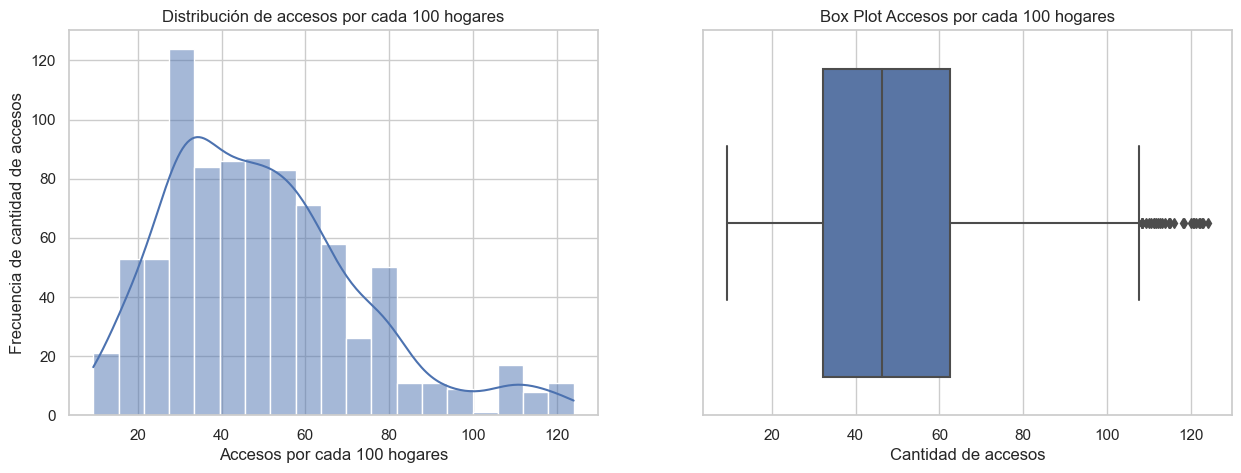

In [122]:
fig, (ax1,ax2) = plt.subplots(ncols=2, figsize=(15, 5))

# Histograma
sns.histplot(x=penetracion_hogar_prov['Accesos por cada 100 hogares'], kde=True, ax=ax1)
ax1.set_title('Distribución de accesos por cada 100 hogares')
ax1.set_ylabel('Frecuencia de cantidad de accesos')
ax1.set_xlabel('Accesos por cada 100 hogares')

#box plot de los accesos por cada 100 hogares
sns.boxplot(x=penetracion_hogar_prov['Accesos por cada 100 hogares'], ax=ax2)
ax2.set_title('Box Plot Accesos por cada 100 hogares')
ax2.set_xlabel('Cantidad de accesos')

plt.show()

**Observaciones**
- La distribución de **Accesos por cada 100 hogares** está sesgada hacia la derecha, lo que indica que hay que gran parte de las provincias tienen una baja penetración de acceso a internet.

2. **Accesos por cada 100 hogares** vs **Provincias**

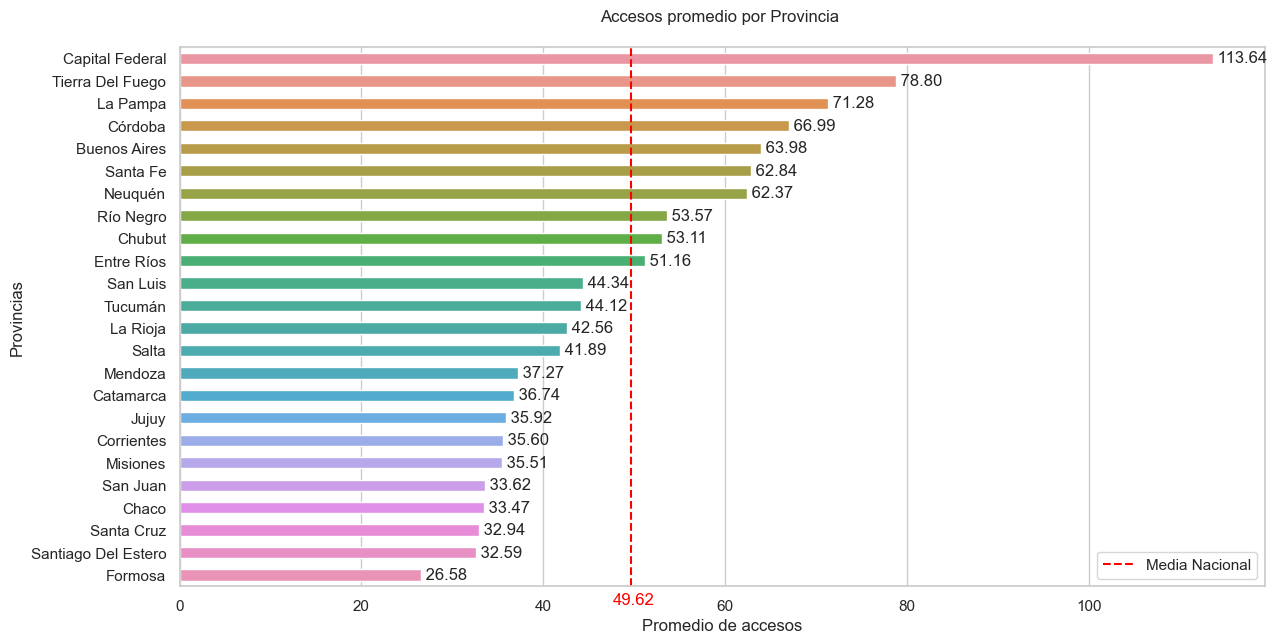

In [123]:
# Agrupamos el dataframe respecto a las provincias
accesos_por_provincia = penetracion_hogar_prov.groupby(by='Provincia')['Accesos por cada 100 hogares'].mean().sort_values(ascending=False)
# Sacamos el promedio general
promedio_general = penetracion_hogar_prov['Accesos por cada 100 hogares'].mean()

# Gráfico de barras de accesos promedios
plt.figure(figsize=(14,7))
plt.title('Accesos promedio por Provincia \n')
sns.barplot(y=accesos_por_provincia.index, x=accesos_por_provincia, width=0.5)
plt.xlabel("Promedio de accesos")
plt.ylabel("Provincias")
# Agregamos los valores promedio a cada barra
for i, value in enumerate(accesos_por_provincia):
    plt.text(value, i, f' {value:.2f}', ha='left', va='center')

# Agregamos una barra vertical con el promedio general
plt.axvline(x=promedio_general, color="red", linestyle="--", label="Media Nacional")
plt.text(promedio_general - 2, len(accesos_por_provincia) + 0.3, f'{promedio_general:.2f}', color='red')

plt.legend()

plt.show()

**Observaciones**
- La Capital Federal tiene; por mucha diferencia, el mayor promedio de acceso a internet por cada 100 hogares, con 113.64 accesos por cada 100 hogares. Le siguen las provincias de Tierra del Fuego y La Pampa con 78.80 y 71.28 respectivamente.
- La provincia de Formosa tiene el menor promedio de acceso a internet por cada 100 hogares, con 26.58 accesos por cada 100 hogares.
- El gráfico muestra una gran variabilidad en la cantidad promedio de acceso entre las diferentes provincias.

3. **Accesos por cada 100 hogares** vs **Año**

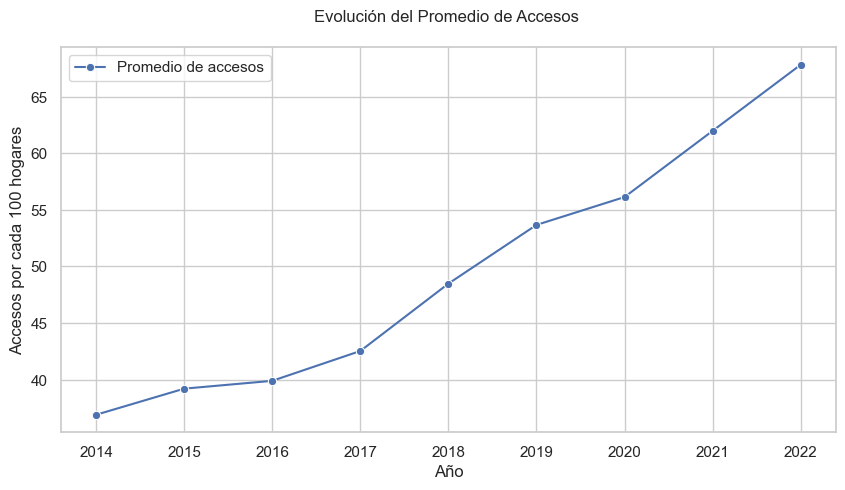

In [124]:
# agrupamos por año y promedio de accesos
accesos_por_año = penetracion_hogar_prov.groupby('Año')['Accesos por cada 100 hogares'].mean().sort_index()

# gráfico de línea de evolución del promedio de accesos por año
plt.figure(figsize=(10,5))
sns.lineplot(x=accesos_por_año.index, y=accesos_por_año, label= 'Promedio de accesos', marker='o')
plt.title("Evolución del Promedio de Accesos \n")
plt.show()

**Observaciones**

- Se observa que hay una ligera disminución en la cantidad promedio desde 2019 a 2020.
- De 2020 a 2021 se observa un incremento en la cantidad promedio de accesos por cada 100 hogares. Este aumento puede estar relacionado con la pandemia COVID-19 y la rápida transición hacia el trabajo remoto, con la implementación de éste último, las clases y eventos virtuales se debe haber disparado la demanda de internet para los hogares.
- La evolución desde el año 2020 a 2021 también no fue tan brusca a pesar de la transición al trabajo remoto, esto se puede deber a las dificultades de muchas personas para acceder a internet debido a la pérdida de empleos tradicionales, la falta de recursos, entre otros.

## Penetración por hogares nacional de Internet fijo **`penetracion_internet_fijo`**

Serie trimestral de la penetración del Internet fijo en la métrica por cada 100 hogares

In [109]:
penetracion_internet_fijo = pd.read_csv('../Telecommunications-Data-Analysis/Original datasets/2-Internet_Penetracion.csv')
penetracion_internet_fijo.head()

,Año,Trimestre,Accesos por cada 100 hogares,Accesos por cada 100 hab,Periodo
0,2022,4,"77,21","24,15",Oct-Dic 2022
1,2022,3,"76,64","23,95",Jul-Sept 2022
2,2022,2,"75,97","23,72",Abr-Jun 2022
3,2022,1,"73,88","23,05",Ene-Mar 2022
4,2021,4,"73,18","22,81",Oct-Dic 2021


In [3]:
penetracion_internet_fijo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Año                           36 non-null     int64 
 1   Trimestre                     36 non-null     int64 
 2   Accesos por cada 100 hogares  36 non-null     object
 3   Accesos por cada 100 hab      36 non-null     object
 4   Periodo                       36 non-null     object
dtypes: int64(2), object(3)
memory usage: 1.5+ KB


Cambiamos los tipos de datos de las columnas **Accesos por cada 100 hogares** y **Accesos por cada 100 hab**

In [4]:
# Reemplazamos las comas por puntos para que el método de conversión no encuentre errores
penetracion_internet_fijo['Accesos por cada 100 hogares'] = penetracion_internet_fijo['Accesos por cada 100 hogares'].str.replace(',', '.')
penetracion_internet_fijo['Accesos por cada 100 hab'] = penetracion_internet_fijo['Accesos por cada 100 hab'].str.replace(',', '.')

# Convertimos la columna a numérico
penetracion_internet_fijo['Accesos por cada 100 hogares'] = pd.to_numeric(penetracion_internet_fijo['Accesos por cada 100 hogares'])
penetracion_internet_fijo['Accesos por cada 100 hab'] = pd.to_numeric(penetracion_internet_fijo['Accesos por cada 100 hab'])

#mostramos la información actualizada
penetracion_internet_fijo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Año                           36 non-null     int64  
 1   Trimestre                     36 non-null     int64  
 2   Accesos por cada 100 hogares  36 non-null     float64
 3   Accesos por cada 100 hab      36 non-null     float64
 4   Periodo                       36 non-null     object 
dtypes: float64(2), int64(2), object(1)
memory usage: 1.5+ KB


Resumen estadístico

In [5]:
penetracion_internet_fijo.describe()

,Año,Trimestre,Accesos por cada 100 hogares,Accesos por cada 100 hab
count,36.000000,36.000000,36.000000,36.000000
mean,2018.000000,2.500000,60.745833,18.760278
std,2.618615,1.133893,8.513140,2.782531
min,2014.000000,1.000000,49.550000,15.050000
25%,2016.000000,1.750000,53.162500,16.307500
50%,2018.000000,2.500000,59.925000,18.485000
75%,2020.000000,3.250000,66.637500,20.695000
max,2022.000000,4.000000,77.210000,24.150000


**Análisis**

1. **Accesos por cada 100 hogares** y **Accesos por cada 100 hab**

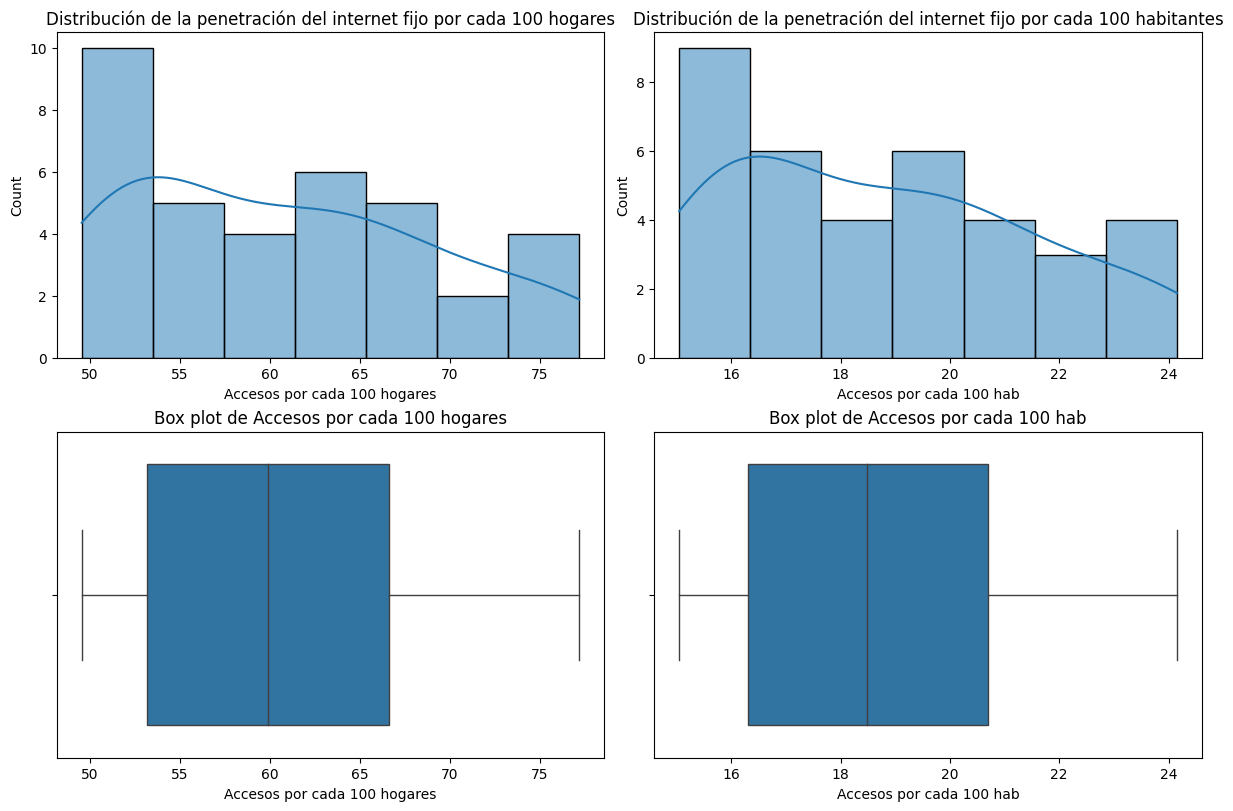

In [6]:
fig, axes = plt.subplots(2, 2, figsize = (12, 8), constrained_layout = True)

# Histograma y boxplot de la columna 'Accesos por cada 100 hogares'
sns.histplot(data = penetracion_internet_fijo, x = 'Accesos por cada 100 hogares', kde = True, ax = axes[0,0])
ax = axes[0,0].set_title('Distribución de la penetración del internet fijo por cada 100 hogares')
sns.boxplot(data = penetracion_internet_fijo, x='Accesos por cada 100 hogares', linewidth = 1, ax = axes[1,0])
axes[1,0].set_title('Box plot de Accesos por cada 100 hogares')
# Histograma y boxplot de la columna 'Accesos por cada 100 hab'
sns.histplot(data = penetracion_internet_fijo, x='Accesos por cada 100 hab', kde = True, ax = axes[0,1])
axes[0,1].set_title('Distribución de la penetración del internet fijo por cada 100 habitantes')
sns.boxplot(data = penetracion_internet_fijo, x='Accesos por cada 100 hab', linewidth = 1, ax = axes[1,1])
axes[1,1].set_title('Box plot de Accesos por cada 100 hab')

plt.show()

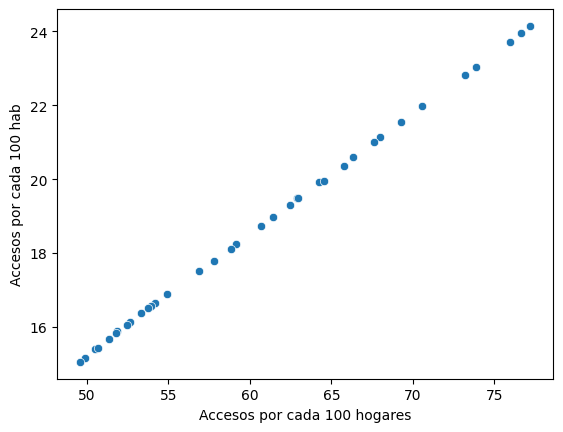

In [11]:
sns.scatterplot(x=penetracion_internet_fijo['Accesos por cada 100 hogares'], y=penetracion_internet_fijo['Accesos por cada 100 hab'])
plt.show()

**Observaciones**

- Existe una fuerte correlación (0.99) entre la cantidad de accesos por hogar y accesos por habitante

2. Evolución de **Accesos por cada 100 hogares** y **Accesos por cada 100 hab**

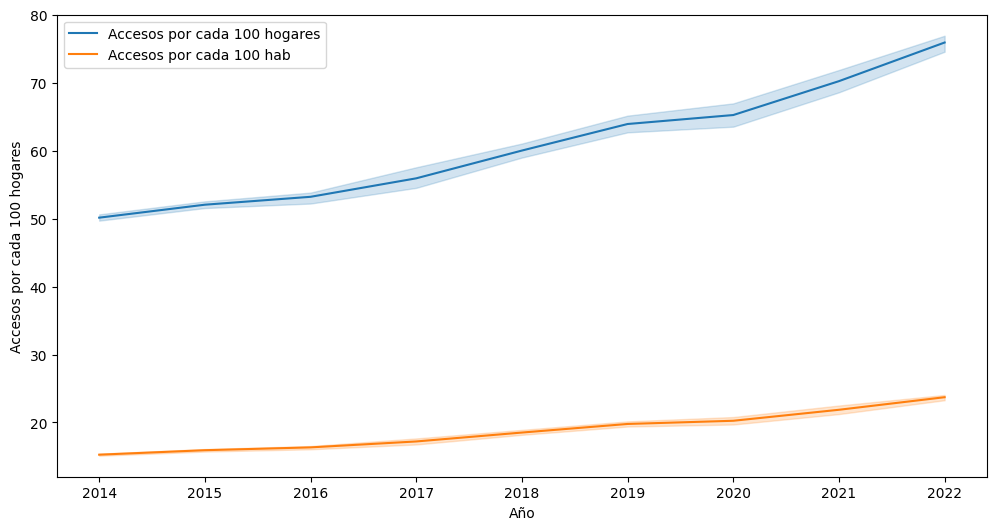

In [20]:
plt.figure(figsize=(12,6))

sns.lineplot(data=penetracion_internet_fijo, x='Año', y='Accesos por cada 100 hogares', label='Accesos por cada 100 hogares')
sns.lineplot(data=penetracion_internet_fijo, x='Año', y='Accesos por cada 100 hab', label='Accesos por cada 100 hab')

plt.show()

## Total nacional de accesos a Internet fijo por banda ancha y banda angosta **`internet_baf_total`**

Número total de accesos al servicio de Internet fijo por banda ancha y banda angosta (trimestral)

In [27]:
internet_baf_total = pd.read_csv('../Telecommunications-Data-Analysis/Original datasets/3-Internet_BAF.csv')
internet_baf_total.head()

,Año,Trimestre,Banda ancha fija,Dial up,Total,Periodo
0,2022,4,11,12,11,Oct-Dic 2022
1,2022,3,11,12,11,Jul-Sept 2022
2,2022,2,11,12,11,Abr-Jun 2022
3,2022,1,11,13,11,Ene-Mar 2022
4,2021,4,10,13,10,Oct-Dic 2021


In [31]:
internet_baf_total.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Año               36 non-null     int64 
 1   Trimestre         36 non-null     int64 
 2   Banda ancha fija  36 non-null     int64 
 3   Dial up           36 non-null     int64 
 4   Total             36 non-null     int64 
 5   Periodo           36 non-null     object
dtypes: int64(5), object(1)
memory usage: 1.8+ KB


Información estadística

In [32]:
internet_baf_total.describe()

,Año,Trimestre,Banda ancha fija,Dial up,Total
count,36.000000,36.000000,36.000000,36.000000,36.000000
mean,2018.000000,2.500000,8.361111,23.083333,8.361111
std,2.618615,1.133893,1.495761,10.171037,1.495761
min,2014.000000,1.000000,6.000000,10.000000,6.000000
25%,2016.000000,1.750000,7.000000,12.000000,7.000000
50%,2018.000000,2.500000,8.000000,27.000000,8.000000
75%,2020.000000,3.250000,9.250000,32.250000,9.250000
max,2022.000000,4.000000,11.000000,39.000000,11.000000


**Análisis**

1. Distribución de **Banda ancha fija**, **Dial up** y **Total**

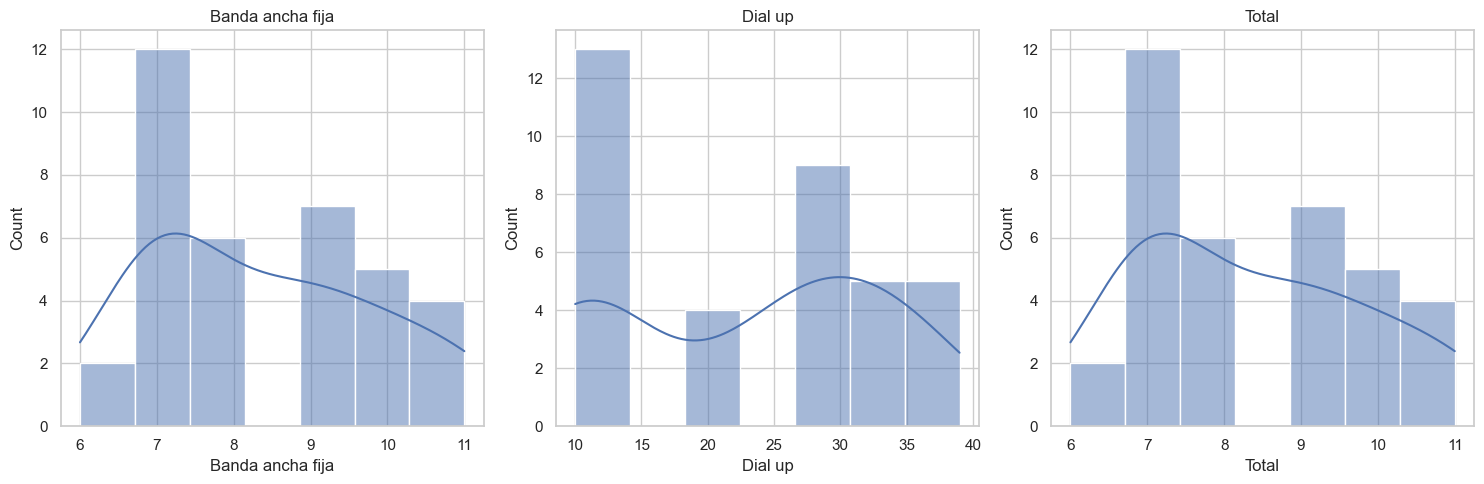

In [42]:
sns.set(style="whitegrid")

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

# Histograma para 'Banda ancha fija'
sns.histplot(internet_baf_total['Banda ancha fija'], kde=True, ax=axes[0])
axes[0].set_title('Banda ancha fija')

# Histograma para 'Dial up'
sns.histplot(internet_baf_total['Dial up'], kde=True, ax=axes[1])
axes[1].set_title('Dial up')

# Histograma para 'Total'
sns.histplot(internet_baf_total['Total'], kde=True, ax=axes[2])
axes[2].set_title('Total')

# Ajusta el diseño de los subgráficos
plt.tight_layout()

# Muestra la imagen
plt.show()

**Observaciones**

- Se observa que para el caso de Banda ancha fija hay un leve sesgo hacia la derecha en la distribución de los datos. Lo que indica que hay observaciones concentradas en valores altos.

2. Boxplot de **Banda ancha fija**, **Dial up** y **Total**

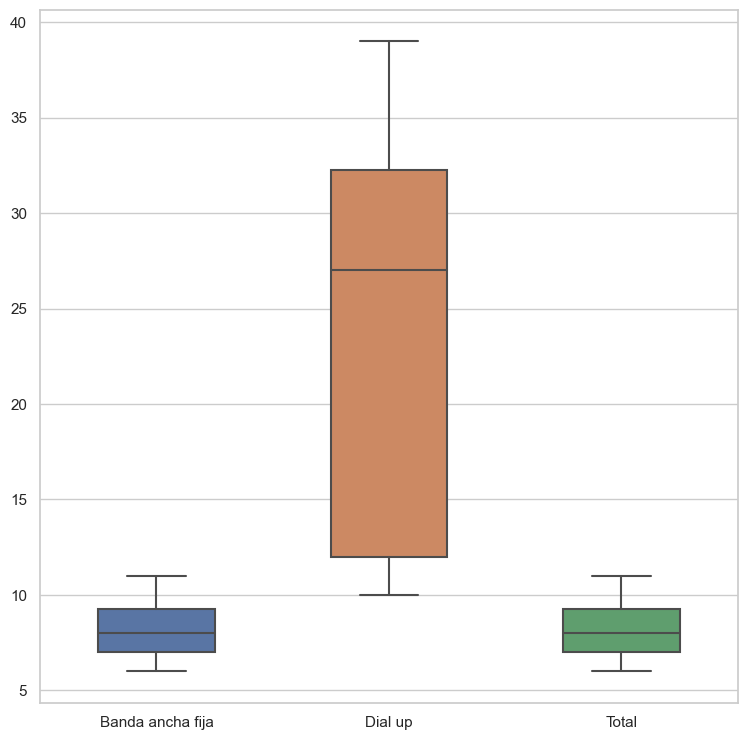

In [49]:
plt.figure(figsize=(9, 9))

# boxplot para las columnas Banda ancha fija, Dial up y Total
sns.boxplot(data=internet_baf_total[['Banda ancha fija', 'Dial up', 'Total']], width=0.5)

plt.show()

**Observaciones**

- No se observan valores atípicos en los diagramas de caja para ninguna de las tres variables, lo que sugiere que los datos están dentro del rango esperado y que no hay observaciones extremas o inusuales.

3. Evolución de **Banda ancha fija**, **Dial up** y **Total**

In [128]:
# Ordenamos el dataframe internet_baf_total por año y trimestre
df = internet_baf_total.sort_values(by=['Año', 'Trimestre'])[['Periodo', 'Banda ancha fija', 'Dial up', 'Total']]

C:\Users\PC - Usuario\AppData\Local\Temp\ipykernel_18064\2109691870.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=90)
C:\Users\PC - Usuario\AppData\Local\Temp\ipykernel_18064\2109691870.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=90)
C:\Users\PC - Usuario\AppData\Local\Temp\ipykernel_18064\2109691870.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[2].set_xticklabels(axes[2].get_xticklabels(), rotation=90)


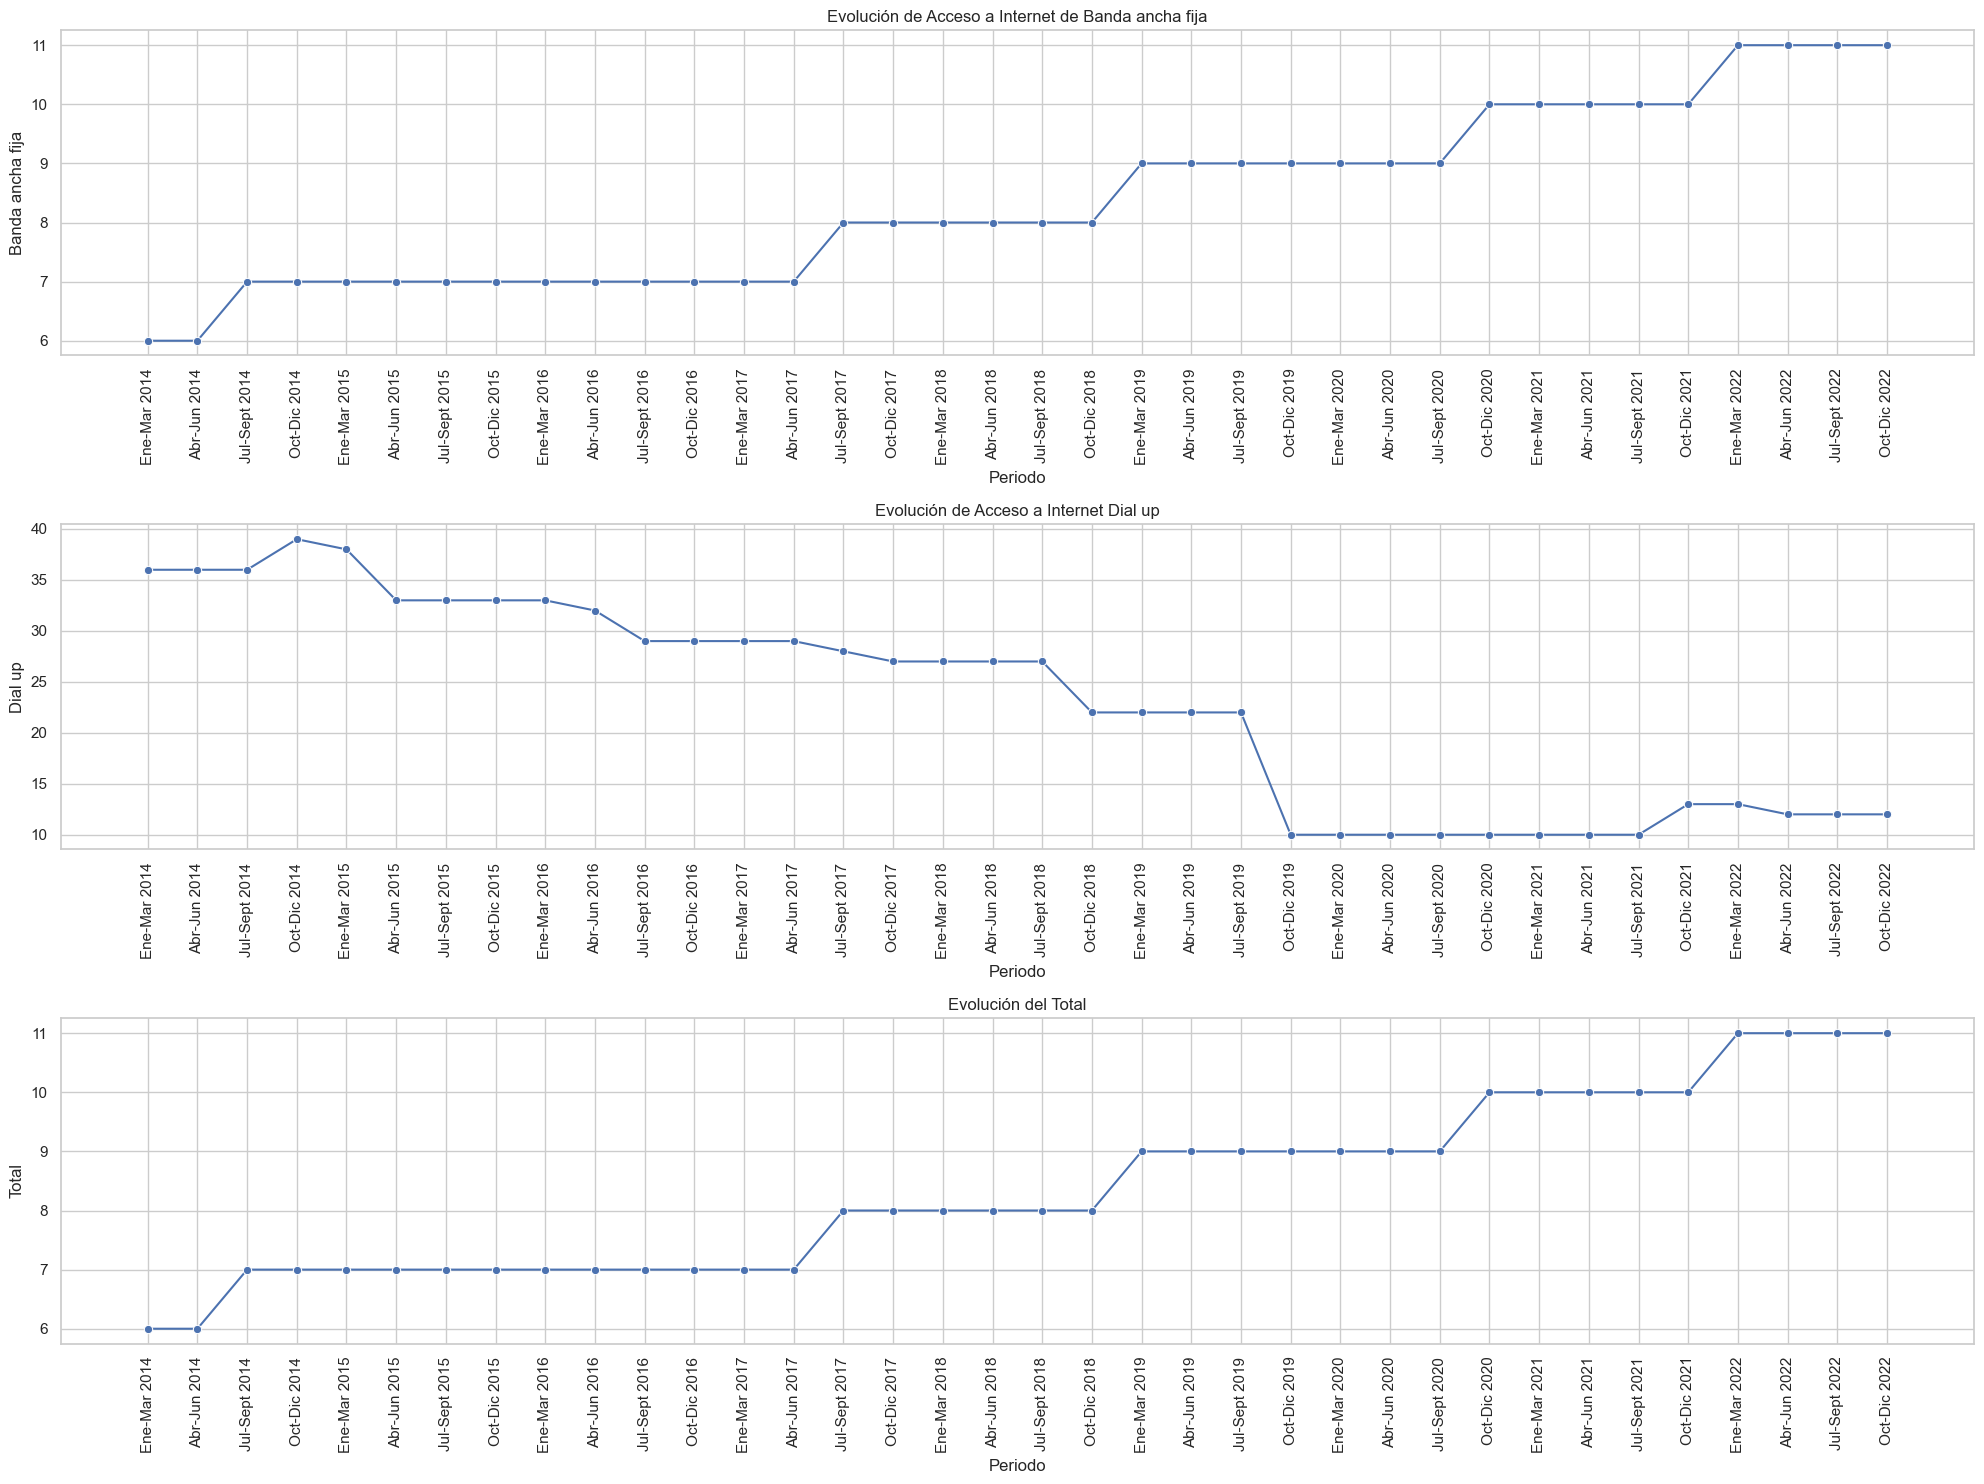

In [134]:
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(20, 15))

# lineplot para 'Banda ancha fija'
sns.lineplot(x=df['Periodo'], y=df['Banda ancha fija'], marker='o', ax=axes[0])
# Rotar las etiquetas
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=90)
axes[0].set_title('Evolución de Acceso a Internet de Banda ancha fija')

# lineplot para 'Dial up'
sns.lineplot(x=df['Periodo'], y=df['Dial up'], marker='o', ax=axes[1])
# Rotar las etiquetas
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=90)
axes[1].set_title('Evolución de Acceso a Internet Dial up')

# lineplot para 'Total'
sns.lineplot(x=df['Periodo'], y=df['Total'], marker='o', ax=axes[2])
# Rotar las etiquetas
axes[2].set_xticklabels(axes[2].get_xticklabels(), rotation=90)
axes[2].set_title('Evolución del Total')

# Ajusta el diseño de los subgráficos
plt.tight_layout()

# Muestra la imagen
plt.show()

**Onservaciones**

- Se puede observar una tendencia general de aumento en la cantidad de accesos por banda ancha fija desde 2014. Este aumento sugiere que la banda ancha fija se está volviendo cada vez más popular como opción de acceso a Internet.

- Se observa que la cantidad de accesos por Dial up ha disminuido significativamente desde el cuarto trimestre del 2014. Sin embargo, se aprecia que hubo un estancamiento a partir del cuarto trimestre del año desde el año 2019 hasta el año 2020 donde los 4 trimestres convergen hacia el mismo valor (10 accesos). A partir de este año la cantidad de accesos a Dial up comienzó levemente a subir. Esta disminución sugiere que está opción de acceso a Internet se está volviendo cada vez menos popular entre los usuarios, y que la banda ancha fija y otras opciones de acceso a Internet están ganando popularidad.

- Globalmente, se observa una tendencia al alza en el total nacional de acceso a internet, con ciertos periodos de estancamiento.

4. Correlaciones entre **Banda ancha fija**, **Dial up** y **Total**

In [126]:
# Usamos sólo las columnas 'Banda ancha fija', 'Dial up' y 'Total'
df = internet_baf_total.sort_values(by=['Año', 'Trimestre'])[['Banda ancha fija', 'Dial up', 'Total']]

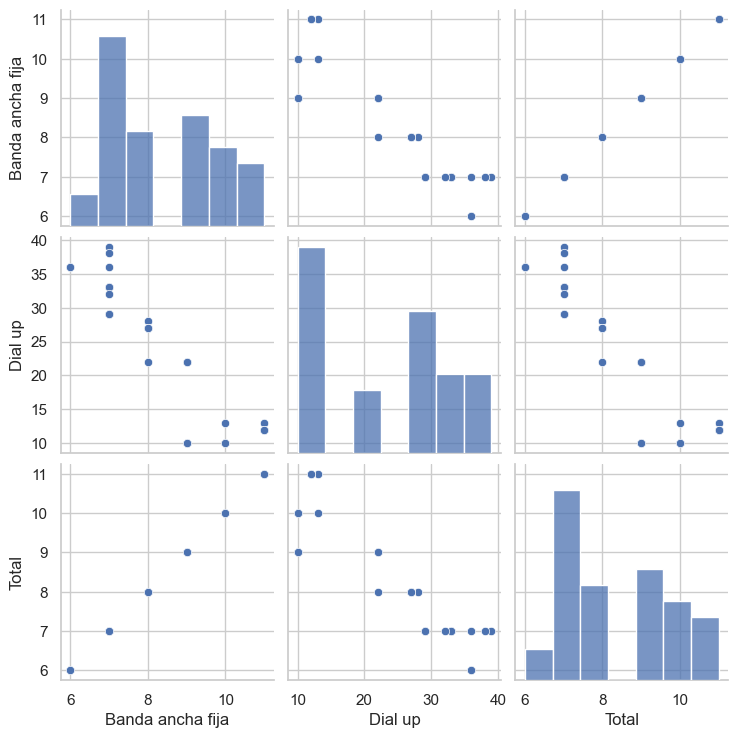

In [127]:
# pairplot del dataframe filtrado
sns.pairplot(data=df)
plt.show()

**Observaciones**

- Se observa una fuerte correlación entre Banda ancha fija y el Total, ya que por análisis anteriores ambos tienen simulares tendencias alcistas.
- También se observa una correlación muy débil entre Dial up y el Total (0.11). Esto sugiere que el Dial-up no es una opción popular entre los usuarios.

## Accesos a banda ancha y banda angosta por provincia **`internet_baf`**

Número de accesos al servicio de Internet fijo por banda ancha y banda angosta en cada provincia (trimestral)

In [9]:
internet_baf = pd.read_csv('../Telecommunications-Data-Analysis/Original datasets/4-Internet_BAF.csv')
internet_baf

,Año,Trimestre,Provincia,Banda ancha fija,Dial up,Total
0,2022,4,Buenos Aires,5,6.0,5
1,2022,4,Capital Federal,2,2.0,2
2,2022,4,Catamarca,71,1.0,71
3,2022,4,Chaco,144,5.0,144
4,2022,4,Chubut,168,904.0,169
...,...,...,...,...,...,...
859,2014,1,Santa Cruz,26,460.0,27
860,2014,1,Santa Fe,506,612.0,507
861,2014,1,Santiago Del Estero,37,9.0,37
862,2014,1,Tierra Del Fuego,27,766.0,28


In [136]:
internet_baf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 864 entries, 0 to 863
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Año               864 non-null    int64  
 1   Trimestre         864 non-null    int64  
 2   Provincia         864 non-null    object 
 3   Banda ancha fija  864 non-null    int64  
 4   Dial up           862 non-null    float64
 5   Total             864 non-null    int64  
dtypes: float64(1), int64(4), object(1)
memory usage: 40.6+ KB


Verificamos las provincias y valores negativos

In [138]:
internet_baf['Provincia'].unique()

array(['Buenos Aires', 'Capital Federal', 'Catamarca', 'Chaco', 'Chubut',
       'Córdoba', 'Corrientes', 'Entre Ríos', 'Formosa', 'Jujuy',
       'La Pampa', 'La Rioja', 'Mendoza', 'Misiones', 'Neuquén',
       'Río Negro', 'Salta', 'San Juan', 'San Luis', 'Santa Cruz',
       'Santa Fe', 'Santiago Del Estero', 'Tierra Del Fuego', 'Tucumán'],
      dtype=object)

In [140]:
internet_baf[(internet_baf['Banda ancha fija']<0) | (internet_baf['Dial up']<0) | (internet_baf['Total']<0)]

,Año,Trimestre,Provincia,Banda ancha fija,Dial up,Total


In [143]:
# Reemplazamos los valores faltantes de la columna 'Dial up' por ceros y convertimos la columna a entero
internet_baf['Dial up'] = internet_baf['Dial up'].fillna(0)
internet_baf['Dial up'] = internet_baf['Dial up'].astype('int')
internet_baf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 864 entries, 0 to 863
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Año               864 non-null    int64 
 1   Trimestre         864 non-null    int64 
 2   Provincia         864 non-null    object
 3   Banda ancha fija  864 non-null    int64 
 4   Dial up           864 non-null    int32 
 5   Total             864 non-null    int64 
dtypes: int32(1), int64(4), object(1)
memory usage: 37.3+ KB


Información estadística

In [144]:
internet_baf.describe()

,Año,Trimestre,Banda ancha fija,Dial up,Total
count,864.000000,864.000000,864.000000,864.000000,864.000000
mean,2018.000000,2.500000,137.326389,150.246528,137.636574
std,2.583484,1.118682,180.812265,230.014490,180.798813
min,2014.000000,1.000000,1.000000,0.000000,1.000000
25%,2016.000000,1.750000,39.000000,2.000000,39.750000
50%,2018.000000,2.500000,90.500000,15.500000,91.000000
75%,2020.000000,3.250000,143.000000,248.500000,143.250000
max,2022.000000,4.000000,987.000000,998.000000,987.000000


**Análisis**

1. Distribución de **Banda ancha fija**, **Dial up** y **Total**

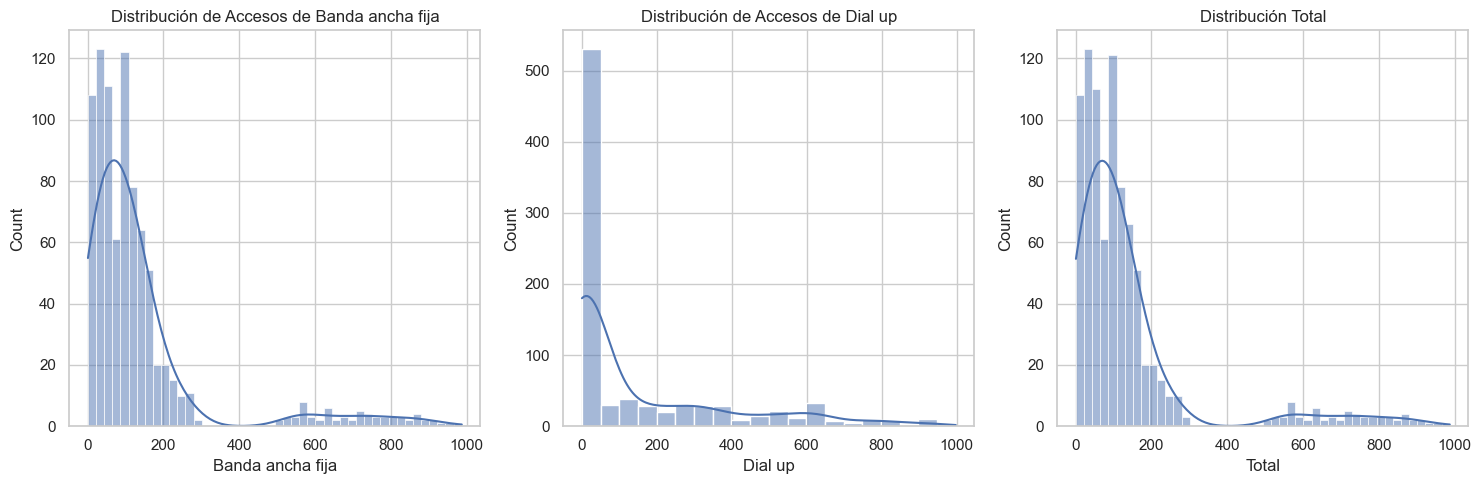

In [149]:
sns.set(style="whitegrid")

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

# Histograma para 'Banda ancha fija'
sns.histplot(internet_baf['Banda ancha fija'], kde=True, ax=axes[0])
axes[0].set_title('Distribución de Accesos de Banda ancha fija')

# Histograma para 'Dial up'
sns.histplot(internet_baf['Dial up'], kde=True, ax=axes[1])
axes[1].set_title('Distribución de Accesos de Dial up')

# Histograma para 'Total'
sns.histplot(internet_baf['Total'], kde=True, ax=axes[2])
axes[2].set_title('Distribución Total')

plt.tight_layout()

plt.show()

2. Boxplot de **Banda ancha fija**, **Dial up** y **Total**

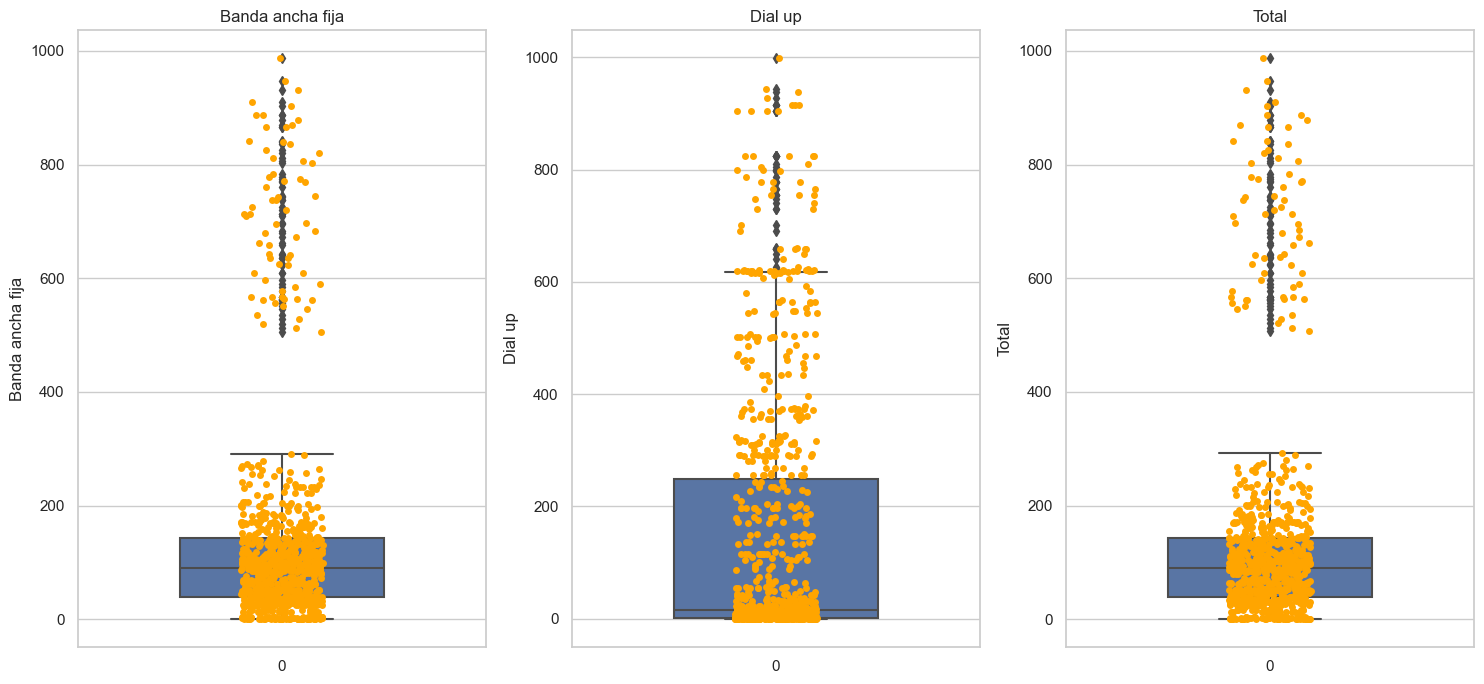

In [146]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 7))

# Histograma para 'Banda ancha fija'
sns.boxplot(internet_baf['Banda ancha fija'], width=0.5, ax=axes[0])
# Gráfico de dispersión de 'Banda ancha fija'
sns.stripplot(internet_baf['Banda ancha fija'], color='orange', ax=axes[0])
axes[0].set_title('Banda ancha fija')

# Histograma para 'Dial up'
sns.boxplot(internet_baf['Dial up'], width=0.5, ax=axes[1])
# Gráfico de dispersión de 'Dial up'
sns.stripplot(internet_baf['Dial up'], color='orange', ax=axes[1])
axes[1].set_title('Dial up')

# Histograma para 'Total'
sns.boxplot(internet_baf['Total'], width=0.5, ax=axes[2])
# Gráfico de dispersión de 'Total'
sns.stripplot(internet_baf['Total'], color='orange', ax=axes[2])
axes[2].set_title('Total')

plt.tight_layout()

plt.show()

**Observaciones**

- El histograma, boxplot y dispersión de la columna 'Banda ancha fija' indican que la mayoría de las provincias tienen un número relativamente bajo de conexiones de banda ancha fija, con una media de 137.33 conexiones. Sin embargo, también hay algunas provincias con un número significativamente mayor de conexiones de banda ancha fija, como la provincia con un valor máximo de alrededor de 987 de conexiones.

- El histograma, boxplot y dispersión de la columna 'Dial up' indican que la mayoría de las provincias tienen un número muy bajo de conexiones de dial-up, con una media de alrededor de 150.25 conexiones. Sin embargo, hay algunas provincias con un número relativamente alto de conexiones de dial-up, como la provincia con un valor máximo de alrededor de 998 conexiones.

- El histograma, boxplot y dispersión de la columna 'Total' indican que la mayoría de las provincias tienen un número relativamente bajo de conexiones de Internet en general, con una media de alrededor de 137.64 conexiones.

3. *Accesos* vs **Provincias**

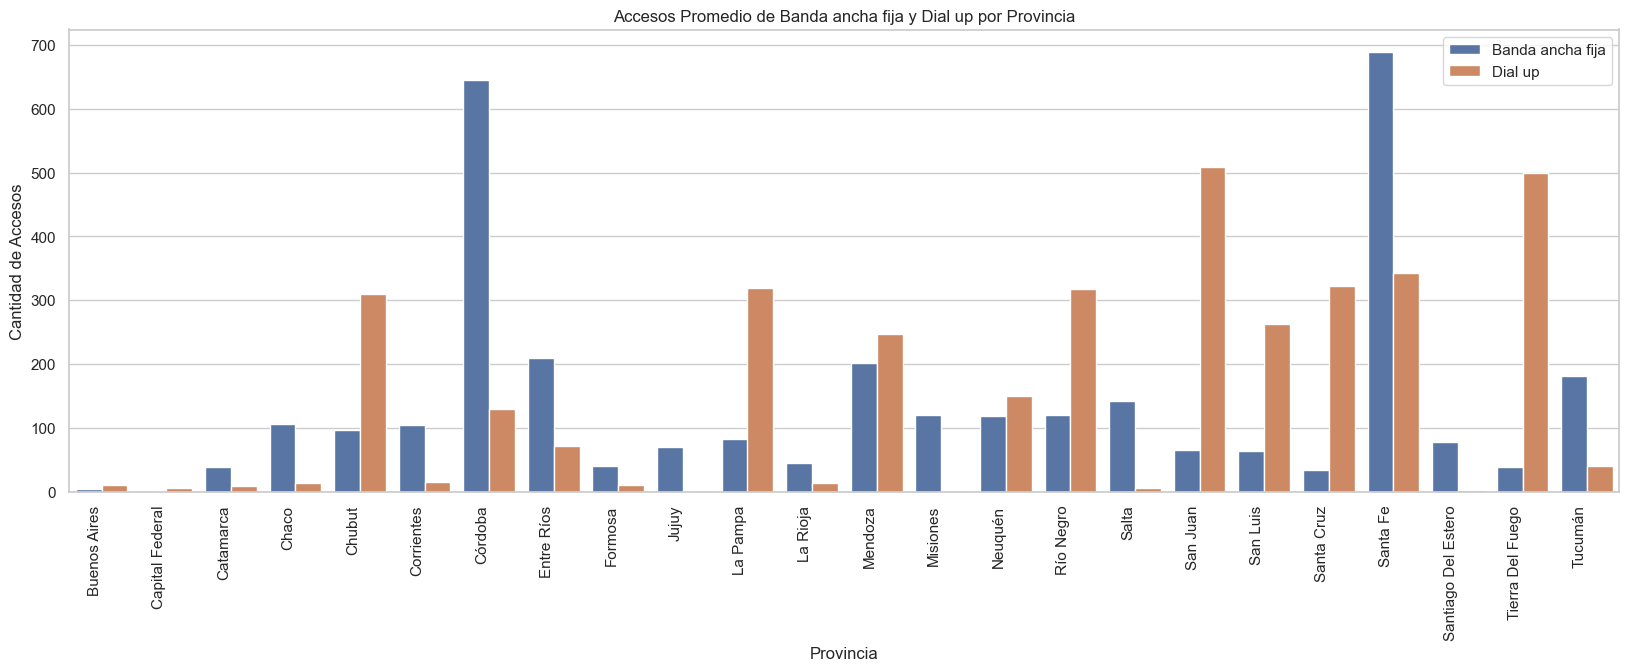

In [191]:
# Calculamos los promedios de 'Banda ancha fija' y 'Dial up'
promedios = internet_baf[['Provincia', 'Banda ancha fija', 'Dial up']].groupby(by='Provincia').mean().reset_index()

sns.set(style="whitegrid")
# Convertimos el DataFrame a un formato largo
promedios_long = promedios.melt('Provincia', var_name='Tipo de conexión', value_name='Frecuencia')

plt.figure(figsize=(20, 6))

# Creamos los histogramas
plot = sns.barplot(x='Provincia', y='Frecuencia', hue='Tipo de conexión', data=promedios_long)

# Ajusta la leyenda y las etiquetas de los ejes
plot.set_xticklabels(plot.get_xticklabels(), rotation=90, horizontalalignment='right')
plt.xlabel("Provincia")
plt.ylabel("Cantidad de Accesos")
plt.title("Accesos Promedio de Banda ancha fija y Dial up por Provincia")
plt.legend()

plt.show()

**Observaciones**

- Las provincias con la mayor cantidad promedio de conexiones de banda ancha fija son Córdoba y Santa Fe superando las 650 conexiones cada una.
- Las provincias con la menor cantidad promedio de conexiones de banda ancha fija son Capital Federal y Buenos Aires.

## Accesos a Internet fijo por tipo de tecnología **`acceso_internet_tecnologia`**
Número de accesos al servicio de Internet fijo por tipo de tecnología. Total nacional (trimestral)

In [2]:
acceso_internet_tecnologia = pd.read_csv('../Telecommunications-Data-Analysis/Original datasets/5-Internet_Accesos-por-tecnologia.csv')
acceso_internet_tecnologia.head()

,Año,Trimestre,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total,Periodo
0,2022,4,1,6,3,573,222,11,Oct-Dic 2022
1,2022,3,1,6,3,557,235,11,Jul-Sept 2022
2,2022,2,1,6,3,556,232,11,Abr-Jun 2022
3,2022,1,2,6,2,546,252,11,Ene-Mar 2022
4,2021,4,2,6,2,523,253,10,Oct-Dic 2021


In [3]:
acceso_internet_tecnologia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Año           36 non-null     int64 
 1   Trimestre     36 non-null     int64 
 2   ADSL          36 non-null     int64 
 3   Cablemodem    36 non-null     int64 
 4   Fibra óptica  36 non-null     int64 
 5   Wireless      36 non-null     int64 
 6   Otros         36 non-null     int64 
 7   Total         36 non-null     int64 
 8   Periodo       36 non-null     object
dtypes: int64(8), object(1)
memory usage: 2.7+ KB


Estadísticas

In [4]:
acceso_internet_tecnologia.describe()

,Año,Trimestre,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total
count,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000
mean,2018.000000,2.500000,3.083333,4.166667,193.361111,257.222222,149.500000,8.361111
std,2.618615,1.133893,1.079021,1.253566,239.714968,180.185319,85.497034,1.495761
min,2014.000000,1.000000,1.000000,2.000000,1.000000,71.000000,54.000000,6.000000
25%,2016.000000,1.750000,2.000000,3.000000,2.750000,85.000000,64.250000,7.000000
50%,2018.000000,2.500000,4.000000,4.000000,159.000000,220.000000,116.500000,8.000000
75%,2020.000000,3.250000,4.000000,5.000000,198.250000,415.250000,247.500000,9.250000
max,2022.000000,4.000000,4.000000,6.000000,941.000000,573.000000,265.000000,11.000000


**Análisis**

1. Distribución de **ADSL**, **Cablemodem**, **Fibra óptica**, **Wireless**, **Otros** y **Total**

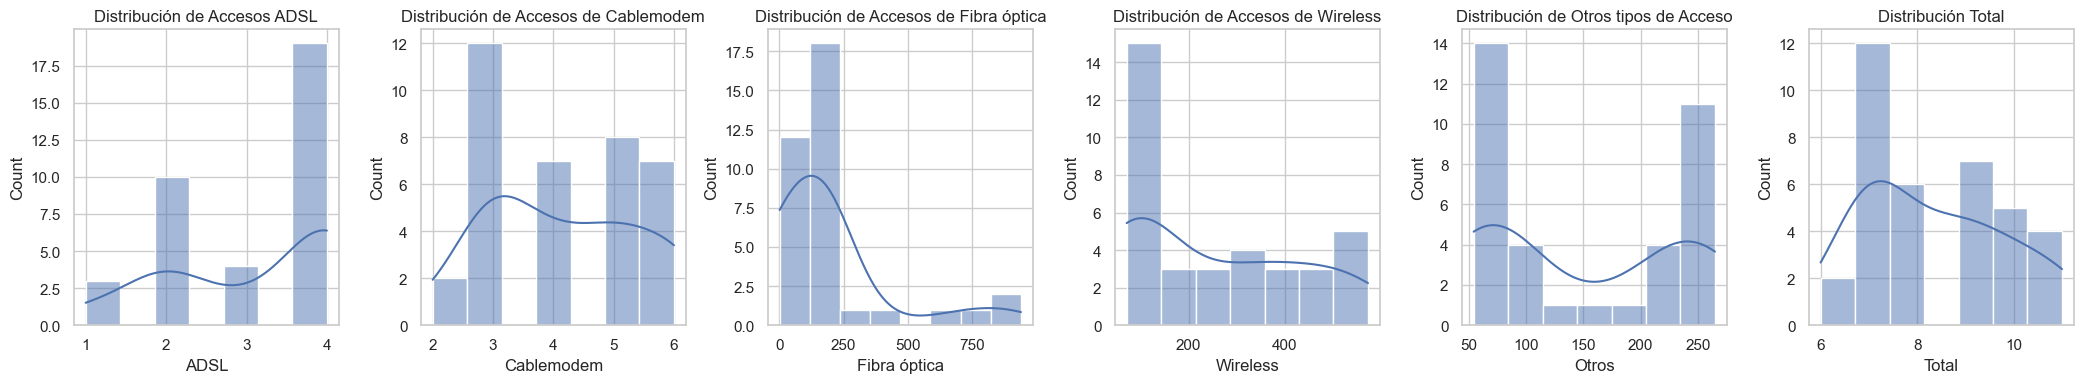

In [5]:
sns.set(style="whitegrid")

fig, axes = plt.subplots(nrows=1, ncols=6, figsize=(21, 4))

# Histograma para 'ADSL'
sns.histplot(acceso_internet_tecnologia['ADSL'], kde=True, ax=axes[0])
axes[0].set_title('Distribución de Accesos ADSL')

# Histograma para 'Cablemodem'
sns.histplot(acceso_internet_tecnologia['Cablemodem'], kde=True, ax=axes[1])
axes[1].set_title('Distribución de Accesos de Cablemodem')

# Histograma para 'Fibra óptica'
sns.histplot(acceso_internet_tecnologia['Fibra óptica'], kde=True, ax=axes[2])
axes[2].set_title('Distribución de Accesos de Fibra óptica')

# Histograma para 'Wireless'
sns.histplot(acceso_internet_tecnologia['Wireless'], kde=True, ax=axes[3])
axes[3].set_title('Distribución de Accesos de Wireless')

# Histograma para 'Otros'
sns.histplot(acceso_internet_tecnologia['Otros'], kde=True, ax=axes[4])
axes[4].set_title('Distribución de Otros tipos de Acceso')

# Histograma para 'Total'
sns.histplot(acceso_internet_tecnologia['Total'], kde=True, ax=axes[5])
axes[5].set_title('Distribución Total')

plt.tight_layout()

plt.show()

**Observaciones**

- Para la tecnología ADSL hay un sesgo hacia la izquierda lo que sugiere que hay años en lo que hubo menor acceso a ella. Mientras que para el caso de la Fibra Óptica el sesgo ocurre hacia la derecha lo que indica que el acceso a esta tecnología ha ido en aumento.

- La distribución para el caso de la tecnología Cablemodem está parcialmente normal con ciertos picos y valles lo que indica que no hay una brecha tan grande entre los accesos para los distintos años.

- La distribución de los datos para la tecnología Wireless muestra una distribución casi uniforme, con una mayor cantidad de datos concentrados en el rango de menor cantidad de accesos. Esto inidca que el acceso a esta tecnología se ha mantenido estable a lo largo de los años.

- En el caso del uso de otras tecnologías, se observa una distribución bimodal leve, lo que indica que los accesos de cercanos a 50 y 250 son los más comunes a lo largo de los años.

2. Boxplot de **ADSL**, **Cablemodem**, **Fibra óptica**, **Wireless**, **Otros** y **Total**

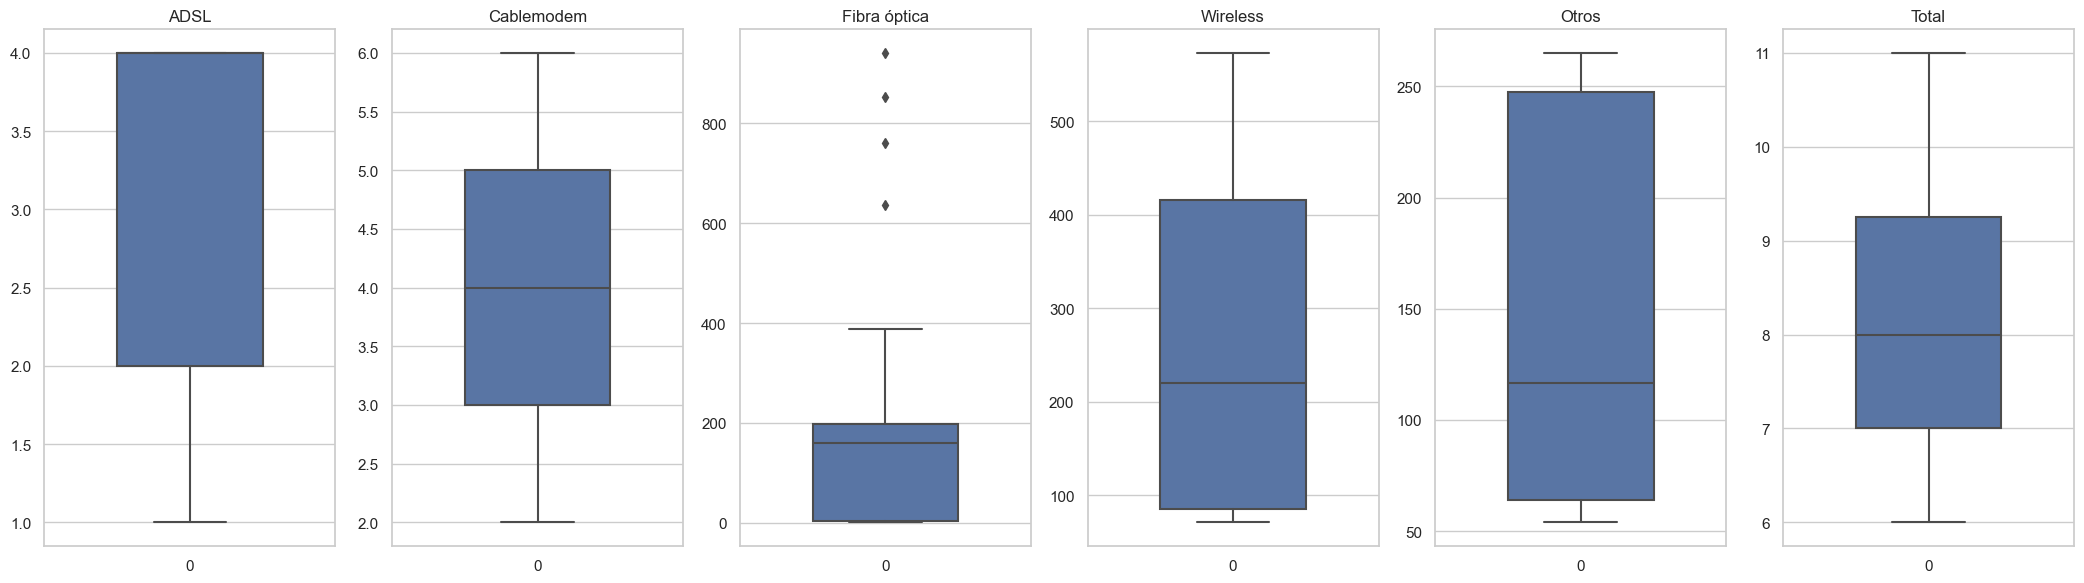

In [8]:
fig, axes = plt.subplots(nrows=1, ncols=6, figsize=(21, 6))

# Histograma para 'ADSL'
sns.boxplot(acceso_internet_tecnologia['ADSL'], width=0.5, ax=axes[0])
axes[0].set_title('ADSL')

# Histograma para 'Cablemodem'
sns.boxplot(acceso_internet_tecnologia['Cablemodem'], width=0.5, ax=axes[1])
axes[1].set_title('Cablemodem')

# Histograma para 'Fibra óptica'
sns.boxplot(acceso_internet_tecnologia['Fibra óptica'], width=0.5, ax=axes[2])
axes[2].set_title('Fibra óptica')

# Histograma para 'Wireless'
sns.boxplot(acceso_internet_tecnologia['Wireless'], width=0.5, ax=axes[3])
axes[3].set_title('Wireless')

# Histograma para 'Otros'
sns.boxplot(acceso_internet_tecnologia['Otros'], width=0.5, ax=axes[4])
axes[4].set_title('Otros')

# Histograma para 'Total'
sns.boxplot(acceso_internet_tecnologia['Total'], width=0.5, ax=axes[5])
axes[5].set_title('Total')

plt.tight_layout()

plt.show()

3. **Año**, **Periodo** vs *Tecnologías*

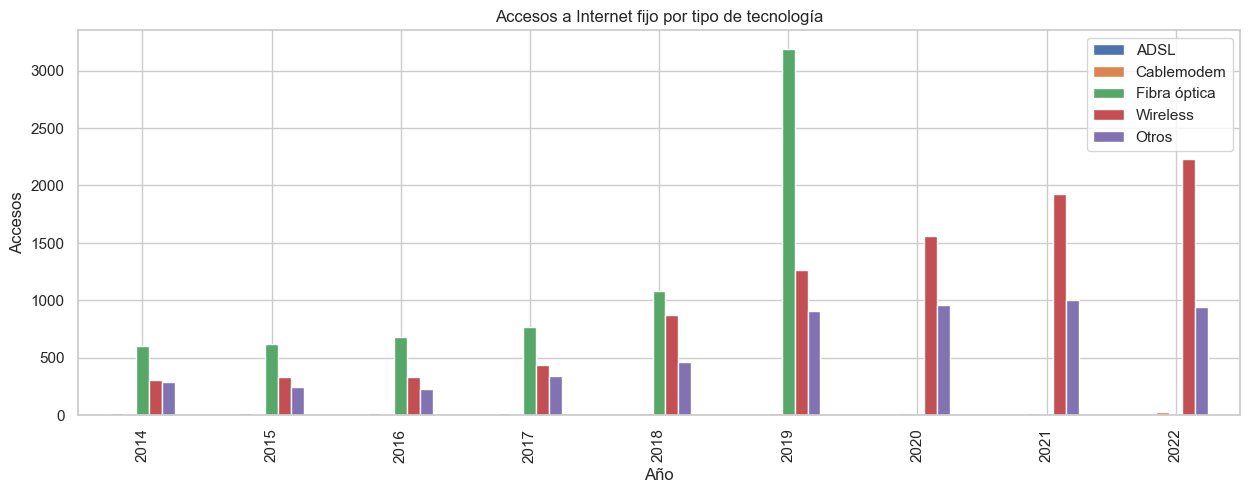

In [41]:
# Agrupamos por año y sumamos las cantidades de accesos
agrupado_por_año = acceso_internet_tecnologia.groupby(by='Año')[['ADSL', 'Cablemodem', 'Fibra óptica', 'Wireless', 'Otros']].sum()

# Gráfico de barras de los diferentes tipos de tecnologías
ax = agrupado_por_año.plot(kind='bar', figsize=(15, 5))

ax.set_title('Accesos a Internet fijo por tipo de tecnología')
ax.set_xlabel('Año')
ax.set_ylabel('Accesos')

plt.show()

## Acceso a Internet fijo por tecnología y provincia  **`acceso_internet_tecnologia_provincia`**
Número de accesos al servicio de Internet fijo por tipo de tecnología en cada provincia (trimestral)

In [98]:
acceso_internet_tecnologia_provincia = pd.read_csv('../Telecommunications-Data-Analysis/Original datasets/6-Internet_Accesos-por-tecnologia.csv')
acceso_internet_tecnologia_provincia

,Año,Trimestre,Provincia,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total
0,2022,4,Buenos Aires,326,3,1,130,72,5
1,2022,4,Capital Federal,139,1,139,5,32,2
2,2022,4,Catamarca,9,11,47,1,2,71
3,2022,4,Chaco,25,61,47,8,3,144
4,2022,4,Chubut,45,74,10,31,9,169
...,...,...,...,...,...,...,...,...,...
859,2014,1,Santa Cruz,19,100,381,4,3,27
860,2014,1,Santa Fe,323,174,3,6,644,507
861,2014,1,Santiago Del Estero,33,4,19,915,34,37
862,2014,1,Tierra Del Fuego,22,3,648,1,3,28


In [99]:
acceso_internet_tecnologia_provincia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 864 entries, 0 to 863
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Año           864 non-null    object
 1   Trimestre     864 non-null    object
 2   Provincia     864 non-null    object
 3   ADSL          864 non-null    int64 
 4   Cablemodem    864 non-null    int64 
 5   Fibra óptica  864 non-null    int64 
 6   Wireless      864 non-null    int64 
 7   Otros         864 non-null    int64 
 8   Total         864 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 60.9+ KB


Verificamos los datos de las primeras tres filas

In [100]:
for columna in acceso_internet_tecnologia_provincia.columns[0:3]:
    print(acceso_internet_tecnologia_provincia[columna].unique(),'\n')

['2022' '2021' '2020' '2019' '2019 *' '2018' '2017' '2016' '2015' '2014'] 

['4' '3' '2' '1' '3 *' '2 *' '1 *'] 

['Buenos Aires' 'Capital Federal' 'Catamarca' 'Chaco' 'Chubut' 'Córdoba'
 'Corrientes' 'Entre Ríos' 'Formosa' 'Jujuy' 'La Pampa' 'La Rioja'
 'Mendoza' 'Misiones' 'Neuquén' 'Río Negro' 'Salta' 'San Juan' 'San Luis'
 'Santa Cruz' 'Santa Fe' 'Santiago Del Estero' 'Tierra Del Fuego'
 'Tucumán'] 



Corregimos inconsistencias

In [101]:
acceso_internet_tecnologia_provincia['Año'] = acceso_internet_tecnologia_provincia['Año'].str.replace(' *','').astype(int)
acceso_internet_tecnologia_provincia['Trimestre'] = acceso_internet_tecnologia_provincia['Trimestre'].str.replace(' *','').astype(int)

In [102]:
for columna in acceso_internet_tecnologia_provincia.columns[0:3]:
    print(acceso_internet_tecnologia_provincia[columna].unique(),'\n')

[2022 2021 2020 2019 2018 2017 2016 2015 2014] 

[4 3 2 1] 

['Buenos Aires' 'Capital Federal' 'Catamarca' 'Chaco' 'Chubut' 'Córdoba'
 'Corrientes' 'Entre Ríos' 'Formosa' 'Jujuy' 'La Pampa' 'La Rioja'
 'Mendoza' 'Misiones' 'Neuquén' 'Río Negro' 'Salta' 'San Juan' 'San Luis'
 'Santa Cruz' 'Santa Fe' 'Santiago Del Estero' 'Tierra Del Fuego'
 'Tucumán'] 



In [103]:
acceso_internet_tecnologia_provincia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 864 entries, 0 to 863
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Año           864 non-null    int32 
 1   Trimestre     864 non-null    int32 
 2   Provincia     864 non-null    object
 3   ADSL          864 non-null    int64 
 4   Cablemodem    864 non-null    int64 
 5   Fibra óptica  864 non-null    int64 
 6   Wireless      864 non-null    int64 
 7   Otros         864 non-null    int64 
 8   Total         864 non-null    int64 
dtypes: int32(2), int64(6), object(1)
memory usage: 54.1+ KB


Estadísticas

In [104]:
acceso_internet_tecnologia_provincia.describe()

,Año,Trimestre,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total
count,864.000000,864.000000,864.000000,864.000000,864.000000,864.000000,864.000000,864.000000
mean,2018.000000,2.500000,86.363426,103.291667,165.432870,57.777778,102.712963,137.636574
std,2.583484,1.118682,116.431490,188.849172,266.807807,156.015038,207.418981,180.798813
min,2014.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,2016.000000,1.750000,21.000000,9.000000,9.000000,4.000000,3.000000,39.750000
50%,2018.000000,2.500000,46.000000,35.500000,25.000000,10.000000,15.000000,91.000000
75%,2020.000000,3.250000,81.000000,72.250000,170.750000,26.000000,47.000000,143.250000
max,2022.000000,4.000000,720.000000,999.000000,998.000000,952.000000,987.000000,987.000000


**Análisis**

1. Distribución de **ADSL**, **Cablemodem**, **Fibra óptica**, **Wireless**, **Otros** y **Total**

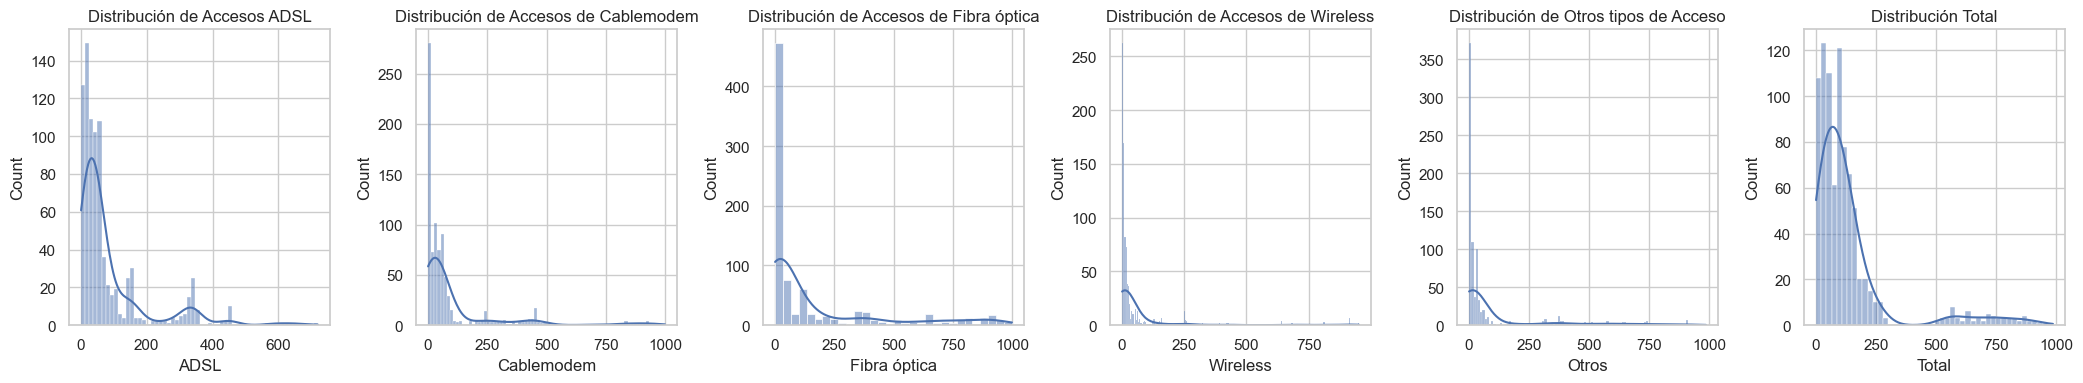

In [105]:
sns.set(style="whitegrid")

fig, axes = plt.subplots(nrows=1, ncols=6, figsize=(21, 4))

# Histograma para 'ADSL'
sns.histplot(acceso_internet_tecnologia_provincia['ADSL'], kde=True, ax=axes[0])
axes[0].set_title('Distribución de Accesos ADSL')

# Histograma para 'Cablemodem'
sns.histplot(acceso_internet_tecnologia_provincia['Cablemodem'], kde=True, ax=axes[1])
axes[1].set_title('Distribución de Accesos de Cablemodem')

# Histograma para 'Fibra óptica'
sns.histplot(acceso_internet_tecnologia_provincia['Fibra óptica'], kde=True, ax=axes[2])
axes[2].set_title('Distribución de Accesos de Fibra óptica')

# Histograma para 'Wireless'
sns.histplot(acceso_internet_tecnologia_provincia['Wireless'], kde=True, ax=axes[3])
axes[3].set_title('Distribución de Accesos de Wireless')

# Histograma para 'Otros'
sns.histplot(acceso_internet_tecnologia_provincia['Otros'], kde=True, ax=axes[4])
axes[4].set_title('Distribución de Otros tipos de Acceso')

# Histograma para 'Total'
sns.histplot(acceso_internet_tecnologia_provincia['Total'], kde=True, ax=axes[5])
axes[5].set_title('Distribución Total')

plt.tight_layout()

plt.show()

2. Boxplot y Diagrama de dispersión de **ADSL**, **Cablemodem**, **Fibra óptica**, **Wireless**, **Otros** y **Total**

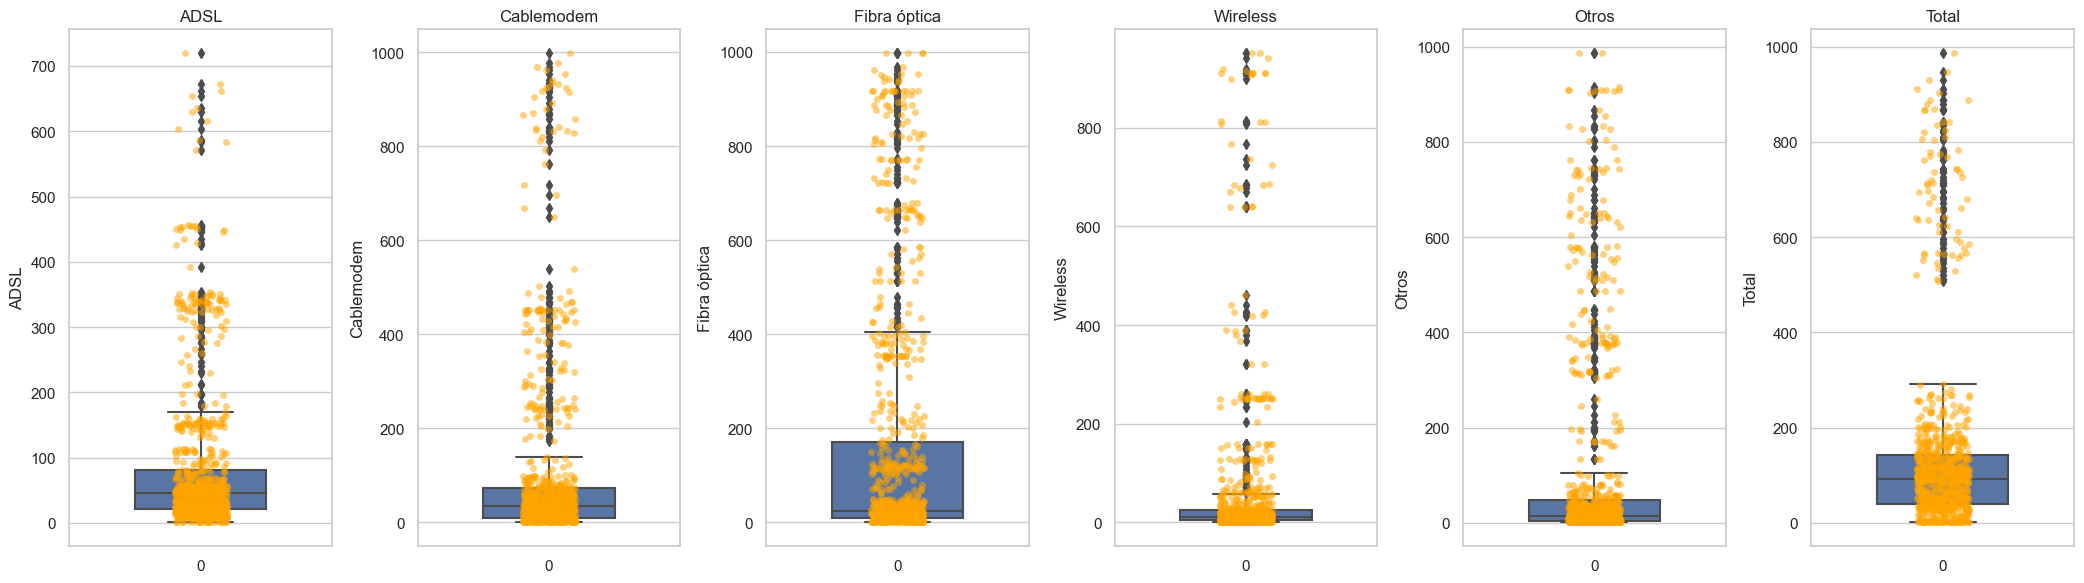

In [106]:
fig, axes = plt.subplots(nrows=1, ncols=6, figsize=(21, 6))

# Boxplot para 'ADSL'
sns.boxplot(acceso_internet_tecnologia_provincia['ADSL'], width=0.5, ax=axes[0])
# Gráfico de dispersión de 'ADSL'
sns.stripplot(acceso_internet_tecnologia_provincia['ADSL'], color='orange', alpha= 0.5, ax=axes[0])
axes[0].set_title('ADSL')

# Boxplot para 'Cablemodem'
sns.boxplot(acceso_internet_tecnologia_provincia['Cablemodem'], width=0.5, ax=axes[1])
# Gráfico de dispersión de 'Cablemodem'
sns.stripplot(acceso_internet_tecnologia_provincia['Cablemodem'], color='orange', alpha= 0.5, ax=axes[1])
axes[1].set_title('Cablemodem')

# Boxplot para 'Fibra óptica'
sns.boxplot(acceso_internet_tecnologia_provincia['Fibra óptica'], width=0.5, ax=axes[2])
# Gráfico de dispersión de 'Fibra óptica'
sns.stripplot(acceso_internet_tecnologia_provincia['Fibra óptica'], color='orange', alpha= 0.5, ax=axes[2])
axes[2].set_title('Fibra óptica')

# Boxplot para 'Wireless'
sns.boxplot(acceso_internet_tecnologia_provincia['Wireless'], width=0.5, ax=axes[3])
# Gráfico de dispersión de 'Wireless'
sns.stripplot(acceso_internet_tecnologia_provincia['Wireless'], color='orange', alpha= 0.5, ax=axes[3])
axes[3].set_title('Wireless')

# Boxplot para 'Otros'
sns.boxplot(acceso_internet_tecnologia_provincia['Otros'], width=0.5, ax=axes[4])
# Gráfico de dispersión de 'Otros'
sns.stripplot(acceso_internet_tecnologia_provincia['Otros'], color='orange', alpha= 0.5, ax=axes[4])
axes[4].set_title('Otros')

# Boxplot para 'Total'
sns.boxplot(acceso_internet_tecnologia_provincia['Total'], width=0.5, ax=axes[5])
# Gráfico de dispersión de 'Total'
sns.stripplot(acceso_internet_tecnologia_provincia['Total'], color='orange', alpha= 0.5, ax=axes[5])
axes[5].set_title('Total')

plt.tight_layout()

plt.show()

**Observaciones**

- Se observa un fuerte sesgo hacia la derecha en todas las tecnologías y el total. Este sesgo podría ser un indicativo de que la mayoría de las provincias presentan un bajo o medio nivel de acceso, mientras que pocas provincias presentan una mayor cantidad de acceso, lo que se confirma con la presencia de valores atípicos. Este sesgo puede estar influenciado por factores como la densidad poblacional, el desarrollo económico y la disponibilidad de infraestructura de telecomunicaciones en cada provincia.

3. Evolución de *tecnologías*

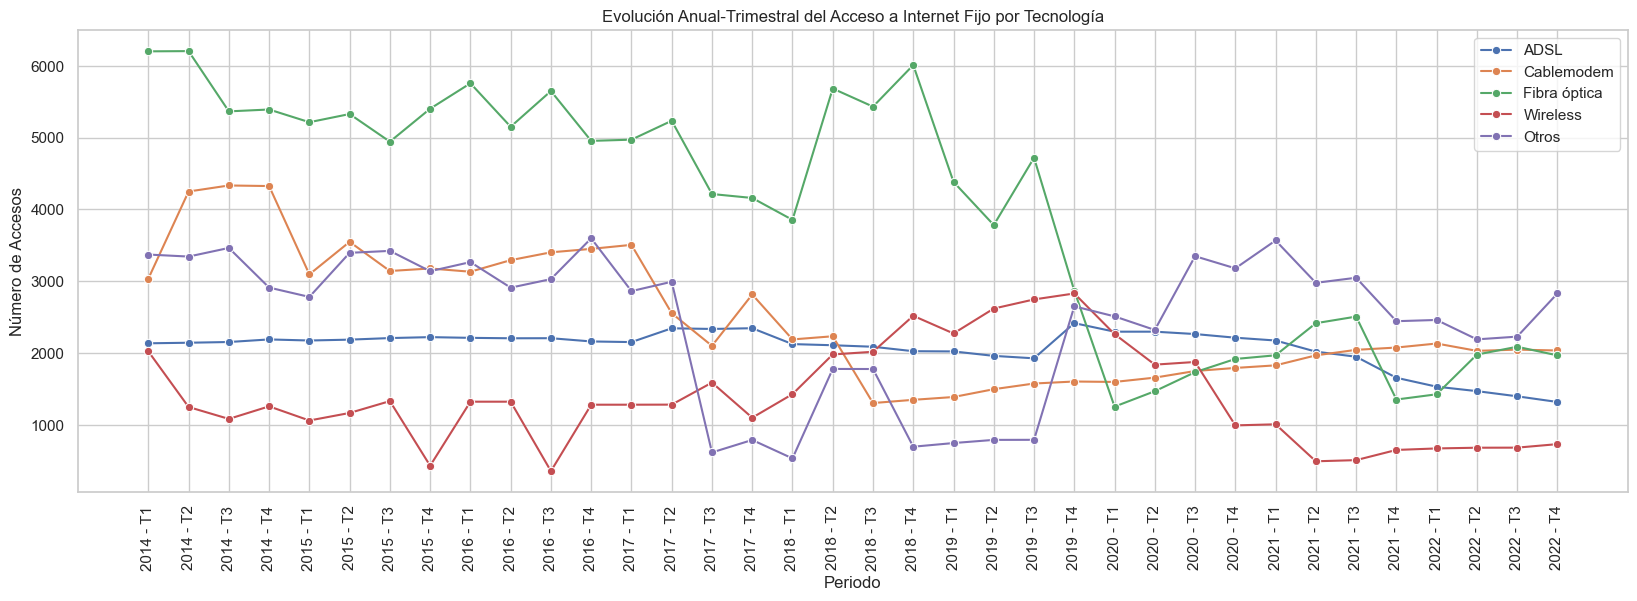

In [107]:
# Tomamos las columnas necesarias para el gráfico
df = acceso_internet_tecnologia_provincia[['Año', 'Trimestre', 'ADSL', 'Cablemodem', 'Fibra óptica', 'Wireless', 'Otros']].groupby(by=['Año', 'Trimestre']).sum().reset_index()
# Creamos una columna 'Periodo' concatenando las columnas 'Año' y 'Trimestre'
df['Periodo'] = df['Año'].astype(str) + ' - T' + df['Trimestre'].astype(str)

plt.figure(figsize=(20,6))

# Graficamos la evolución del Acceso al Internet fijo para cada tipo de Tecnología
for columna in ['ADSL', 'Cablemodem', 'Fibra óptica', 'Wireless', 'Otros']:
    sns.lineplot(x= df['Periodo'], y=df[columna], label= columna, marker= 'o')

plt.title('Evolución Anual-Trimestral del Acceso a Internet Fijo por Tecnología')
plt.xlabel('Periodo')
plt.ylabel('Número de Accesos')
plt.xticks(rotation = 90)
plt.legend()

plt.show()

**Observaciones**

- La cantidad de accesos de ADSL se ha mantenido relativamente constante con leves fluctuaciones del año 2014 al 2019 y; a partir del tercer trimestre de 2020 comienza la disminución en los accesos. Lo que es un indicativo de preferencias hacia otras tecnologías.

- La cantidad de acceso de Cablemoden ha ido decayendo desde 2014 hasta el tercer trimestre de 2018, lo que indicaría la preferencia hacia otros tipos de tecnologías. Aún así, experimentó un leve crecimiento desde 2018 hasta mediados de 2022.

- El acceso por fibra óptica fue el más utilizado hasta finales de 2019, para después experimentar una fuerte caída hasta el primer trimestre de 2020, con ciertas fluctuaciones en adelante.

- Para el caso de Wireless se observa un crecimiento en la cantidad de accesos a esta tecnología a partir del año 2018. A pesar de ello, sigue siendo una tecnología con poca cantidad de acceso en comparación con las demás, más se hizo notar con la caída que tuvo desde el cuarto trimestre del 2019.

- Aunque no hay una clara información con respecto a que tecnologías hace referencia la variable *Otros* se puede observar bastantes fluctuaciones (algunas de ellas muy bruscas) a lo largo del tiempo especialmente del año 2017 al 2019, presantando un aumento para el cuarto trimestre de este último año, para luego experimentar otro aumento en el trascurso del 2020 posiblemente debido a la demanda que originó el COVID-19 haciendo que los usuarios tuviesen preferencias hacia otras tecnologías.

## Velocidad Media de bajada de Internet fijo **`velocidad_internet`**

In [152]:
velocidad_internet = pd.read_csv('../Telecommunications-Data-Analysis/Original datasets/7-historico_velocidad_internet.csv')
velocidad_internet.head()

,Año,Trimestre,Mbps (Media de bajada),Trimestre.1
0,2022,4,10.656,Oct-Dic 2022
1,2022,3,6.246,Jul-Sept 2022
2,2022,2,5.844,Abr-Jun 2022
3,2022,1,5.511,Ene-Mar 2022
4,2021,4,5.234,Oct-Dic 2021


In [138]:
velocidad_internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Año                     36 non-null     int64  
 1   Trimestre               36 non-null     int64  
 2   Mbps (Media de bajada)  36 non-null     float64
 3   Trimestre.1             36 non-null     object 
dtypes: float64(1), int64(2), object(1)
memory usage: 1.3+ KB


Estadísticas

In [139]:
velocidad_internet.describe()

,Año,Trimestre,Mbps (Media de bajada)
count,36.000000,36.000000,36.000000
mean,2018.000000,2.500000,221.615333
std,2.618615,1.133893,275.439068
min,2014.000000,1.000000,1.201000
25%,2016.000000,1.750000,3.520500
50%,2018.000000,2.500000,5.677500
75%,2020.000000,3.250000,461.000000
max,2022.000000,4.000000,834.000000


**Observaciones**

- La velocidad media de bajada ha ido aumentando a lo largo del tiempo, desde un mínimo de 1.20 Mbps en 2014 hasta un máximo de 834 Mbps para el año 2022.

- El valor mediano de la velocidad media de bajada (5.68 Mbps) es significativamente menor que la media (221.61 Mbps), lo que indica que hay una cantidad significativa de conexiones más lentas que arrastran el promedio hacia abajo.

**Análisis**

1. Histograma y Boxplot de **Mbps (Media de bajada)**

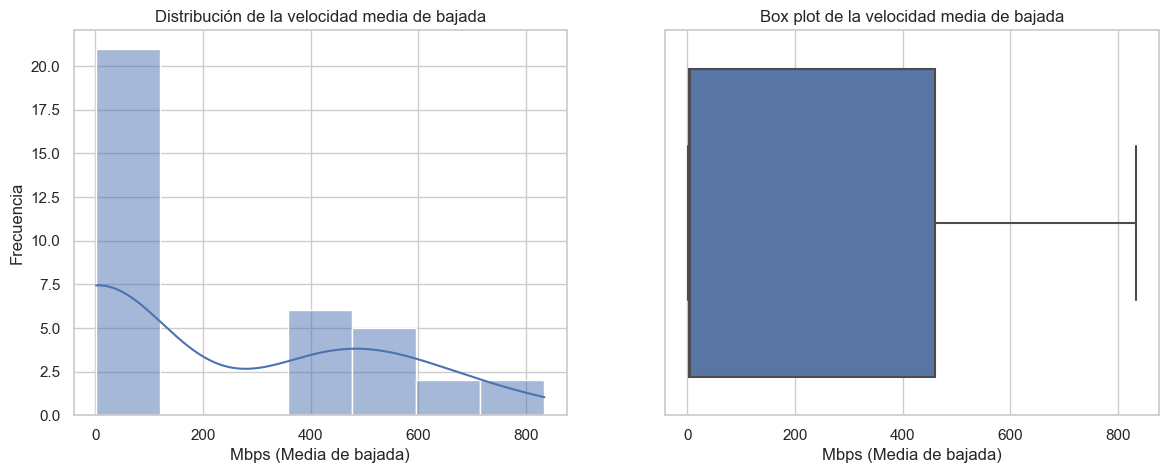

In [142]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(14, 5))

# Histograma de 'Mbps (Media de bajada)'
sns.histplot(data = velocidad_internet, x = 'Mbps (Media de bajada)', kde =  True, ax = ax1)
ax1.set_title('Distribución de la velocidad media de bajada')
ax1.set_xlabel('Mbps (Media de bajada)')
ax1.set_ylabel('Frecuencia')

# Box plot de 'Mbps (Media de bajada)'
sns.boxplot(data = velocidad_internet, x = 'Mbps (Media de bajada)', ax = ax2)
ax2.set_title('Box plot de la velocidad media de bajada')
ax2.set_xlabel('Mbps (Media de bajada)')

plt.show()

**Obsrvaciones**

- La distribución de la velocidad media de bajada está sesgada hacia la izquierda, lo que sugiere que hay una cantidad significativa de conexiones más lentas que arrastran el promedio hacia abajo.

2. Evolución de **Mbps (Media de bajada)**

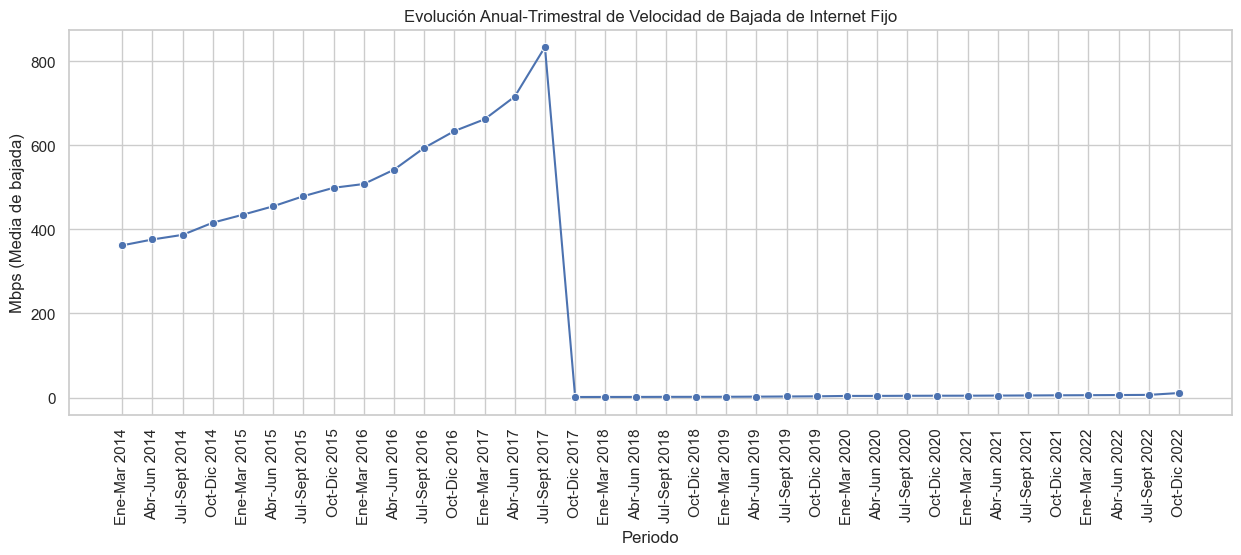

In [150]:
plt.figure(figsize=(15,5))

sns.lineplot(data=velocidad_internet.sort_values(['Año', 'Trimestre']), x='Trimestre.1', y='Mbps (Media de bajada)', marker='o')

plt.title('Evolución Anual-Trimestral de Velocidad de Bajada de Internet Fijo')
plt.xlabel('Periodo')
plt.ylabel('Mbps (Media de bajada)')
plt.xticks(rotation = 90)

plt.show()

## Velocidad media de bajada de Internet fijo por provincia **`velocidad_internet_provincia`**

In [3]:
velocidad_internet_provincia = pd.read_csv('../Telecommunications-Data-Analysis/Original datasets/8-historico_velocidad_internet.csv')
velocidad_internet_provincia

,Año,Trimestre,Provincia,Mbps (Media de bajada)
0,2022,4,Buenos Aires,111.000
1,2022,4,Capital Federal,18.286
2,2022,4,Catamarca,8.333
3,2022,4,Chaco,10.402
4,2022,4,Chubut,1.592
...,...,...,...,...
859,2014,1,Santa Cruz,332.000
860,2014,1,Santa Fe,315.000
861,2014,1,Santiago Del Estero,295.000
862,2014,1,Tierra Del Fuego,345.000


In [4]:
velocidad_internet_provincia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 864 entries, 0 to 863
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Año                     864 non-null    int64  
 1   Trimestre               864 non-null    int64  
 2   Provincia               864 non-null    object 
 3   Mbps (Media de bajada)  864 non-null    float64
dtypes: float64(1), int64(2), object(1)
memory usage: 27.1+ KB


Estadísticas

In [5]:
velocidad_internet_provincia.describe()

,Año,Trimestre,Mbps (Media de bajada)
count,864.000000,864.000000,864.000000
mean,2018.000000,2.500000,302.410067
std,2.583484,1.118682,287.314571
min,2014.000000,1.000000,1.000000
25%,2016.000000,1.750000,2.808500
50%,2018.000000,2.500000,344.000000
75%,2020.000000,3.250000,520.250000
max,2022.000000,4.000000,988.000000


**Observaciones**

- La media de la velocidad de bajada de internet en las provincias es de alrededor de 302.41 Mbps. Sin embargo, la desviación estándar es levemente más baja (287.31 Mbps), lo que indica que hay una gran variabilidad en los datos. Esto significa que algunas provincias pueden tener velocidades de internet mucho más altas o más bajas que la media.

- El percentil 25 de la velocidad de internet es de 2.8 Mbps, lo que indica que hay provincias que están experimentando velocidades de internet muy bajas.

- El percentil 50 (mediana) es de 344 Mbps, esto ratifica que exista una gran cantidad de provincias con velocidades de internet muy bajo. Sin embargo; sumado al percentil 25, sugiere también que existe una enorme brecha digital por provincias.

- El percentil 75 (520.25 Mbps) indica que existen provincias con velocidades de internet muy altas.

**Análisis**

1. Histograma y boxplot de **Mbps (Media de bajada)**

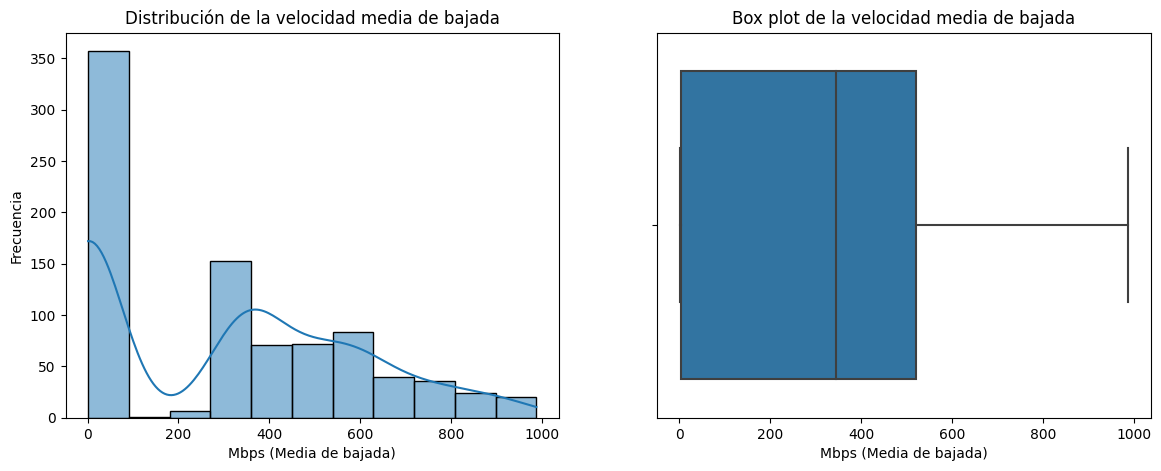

In [7]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(14, 5))

# Histograma de 'Mbps (Media de bajada)'
sns.histplot(data = velocidad_internet_provincia, x = 'Mbps (Media de bajada)', kde =  True, ax = ax1)
ax1.set_title('Distribución de la velocidad media de bajada')
ax1.set_xlabel('Mbps (Media de bajada)')
ax1.set_ylabel('Frecuencia')

# Box plot de 'Mbps (Media de bajada)'
sns.boxplot(data = velocidad_internet_provincia, x = 'Mbps (Media de bajada)', ax = ax2)
ax2.set_title('Box plot de la velocidad media de bajada')
ax2.set_xlabel('Mbps (Media de bajada)')

plt.show()

2. **Provincias** vs **Mbps (Media de bajada)**

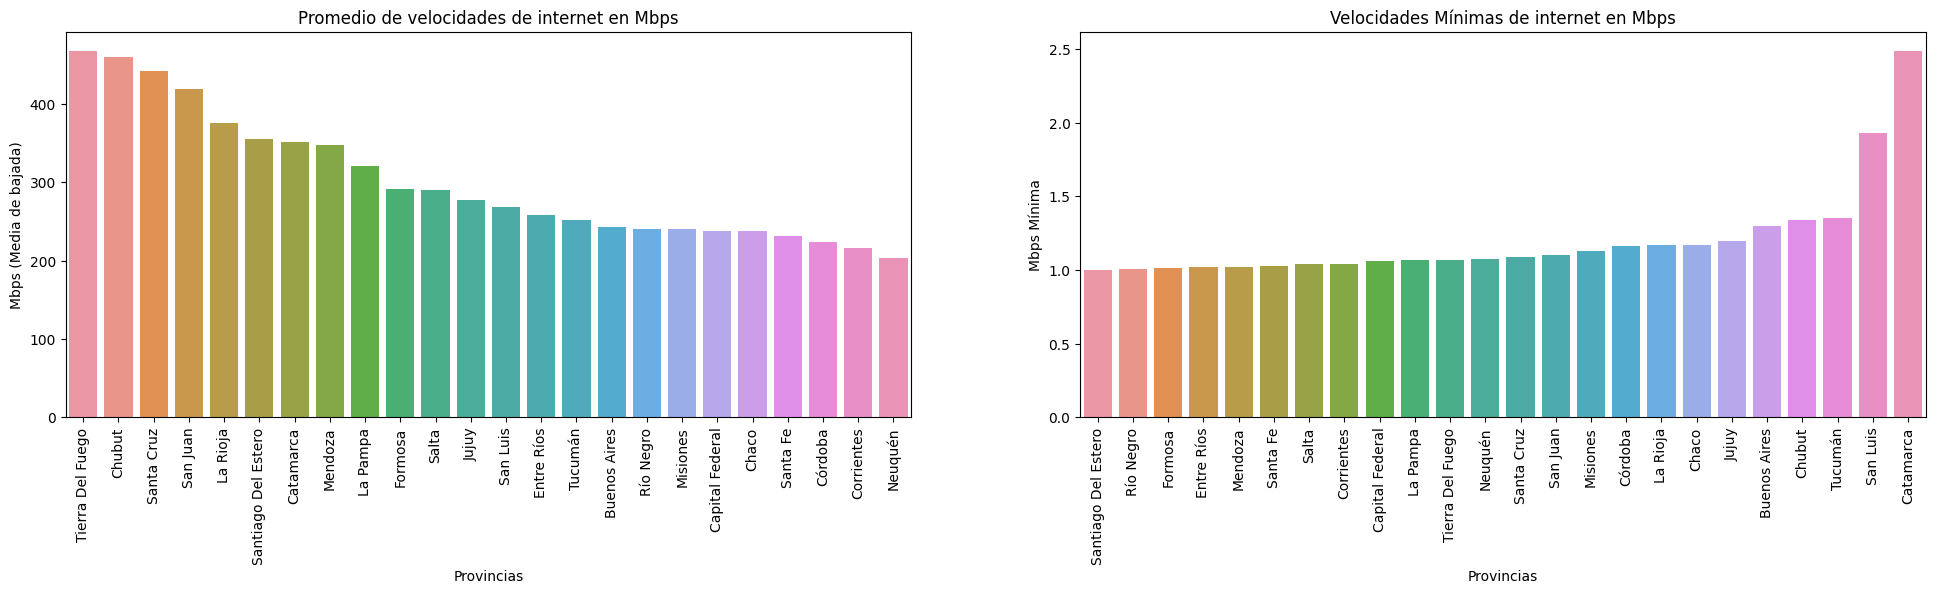

In [25]:
# Agrupamos el dataframe por provincias y sacamos el promedio de velocidades de internet
velocidad_promedio_por_provincia = velocidad_internet_provincia.groupby('Provincia')['Mbps (Media de bajada)'].mean().reset_index().sort_values('Mbps (Media de bajada)', ascending=False)

# Agrupamos el dataframe por provincias y sacamos elos mínimos de velocidades de internet
velocidad_minima_por_provincia = velocidad_internet_provincia.groupby('Provincia')['Mbps (Media de bajada)'].min().reset_index().sort_values('Mbps (Media de bajada)')

# Graficamos ambos DFs
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(24, 5))

# Gráfico de barras para velocidades promedio
sns.barplot(data=velocidad_promedio_por_provincia, x='Provincia', y='Mbps (Media de bajada)', ax=ax1)
ax1.set_title('Promedio de velocidades de internet en Mbps')
ax1.set_xlabel('Provincias')
ax1.set_ylabel('Mbps (Media de bajada)')
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90)

# Gráfico de barras para velocidades mínimas
sns.barplot(data=velocidad_minima_por_provincia, x='Provincia', y='Mbps (Media de bajada)', ax=ax2)
ax2.set_title('Velocidades Mínimas de internet en Mbps')
ax2.set_xlabel('Provincias')
ax2.set_ylabel('Mbps Mínima')
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90)

plt.show()

3. **Año**, **Trimestre** vs *Mbps*

In [63]:
# Agrupamos por Provincia Año y Trimestre y promediamos las velocidades
evolucion_internet = velocidad_internet_provincia.groupby(['Provincia', 'Año', 'Trimestre']).mean().reset_index()
# Creamos una columna 'Periodo' concatenando las columnas 'Año' y 'Trimestre'
evolucion_internet['Periodo'] = evolucion_internet['Año'].astype(str) + ' - T' + evolucion_internet['Trimestre'].astype(str)

# Separamos en dataframes respecto a la región geográfica a la que pertenece cada una

# Región Noroeste
evolucion_internet_noroeste = evolucion_internet[evolucion_internet['Provincia'].isin(['Tucumán', 'Santiago del Estero', 'Salta', 'Jujuy', 'Catamarca'])]
# Región Noreste
evolucion_internet_noreste = evolucion_internet[evolucion_internet['Provincia'].isin(['Misiones', 'Formosa', 'Corrientes', 'Chaco'])]
# Región Cuyo
evolucion_internet_cuyo = evolucion_internet[evolucion_internet['Provincia'].isin(['San Luis', 'San Juan', 'Mendoza', 'La Rioja'])]
# Región Centro
evolucion_internet_centro = evolucion_internet[evolucion_internet['Provincia'].isin(['Santa Fe', 'Entre Ríos', 'Córdoba', 'Capital Federal', 'Buenos Aires'])]
# Región Patagonia
evolucion_internet_patagonia = evolucion_internet[evolucion_internet['Provincia'].isin(['La Pampa', 'Neuquén', 'Rio Negro', 'Chubut', 'Santa Cruz', 'Tierra del Fuego'])]

C:\Users\PC - Usuario\AppData\Local\Temp\ipykernel_12560\572269310.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[0,0].set_xticklabels(axes[0,0].get_xticklabels(), rotation=90)
C:\Users\PC - Usuario\AppData\Local\Temp\ipykernel_12560\572269310.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[0,1].set_xticklabels(axes[0,1].get_xticklabels(), rotation=90)
C:\Users\PC - Usuario\AppData\Local\Temp\ipykernel_12560\572269310.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[1,0].set_xticklabels(axes[1,0].get_xticklabels(), rotation=90)
C:\Users\PC - Usuario\AppData\Local\Temp\ipykernel_12560\572269310.py:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[1,1].set_xticklabels(axes[1,1].get_xticklabels(), rotation=90)
C:\Users\PC - Usuario\AppData\Local\Temp\ipykernel_12560\572269310.py:26: UserWarning: FixedFormatter should only be used tog

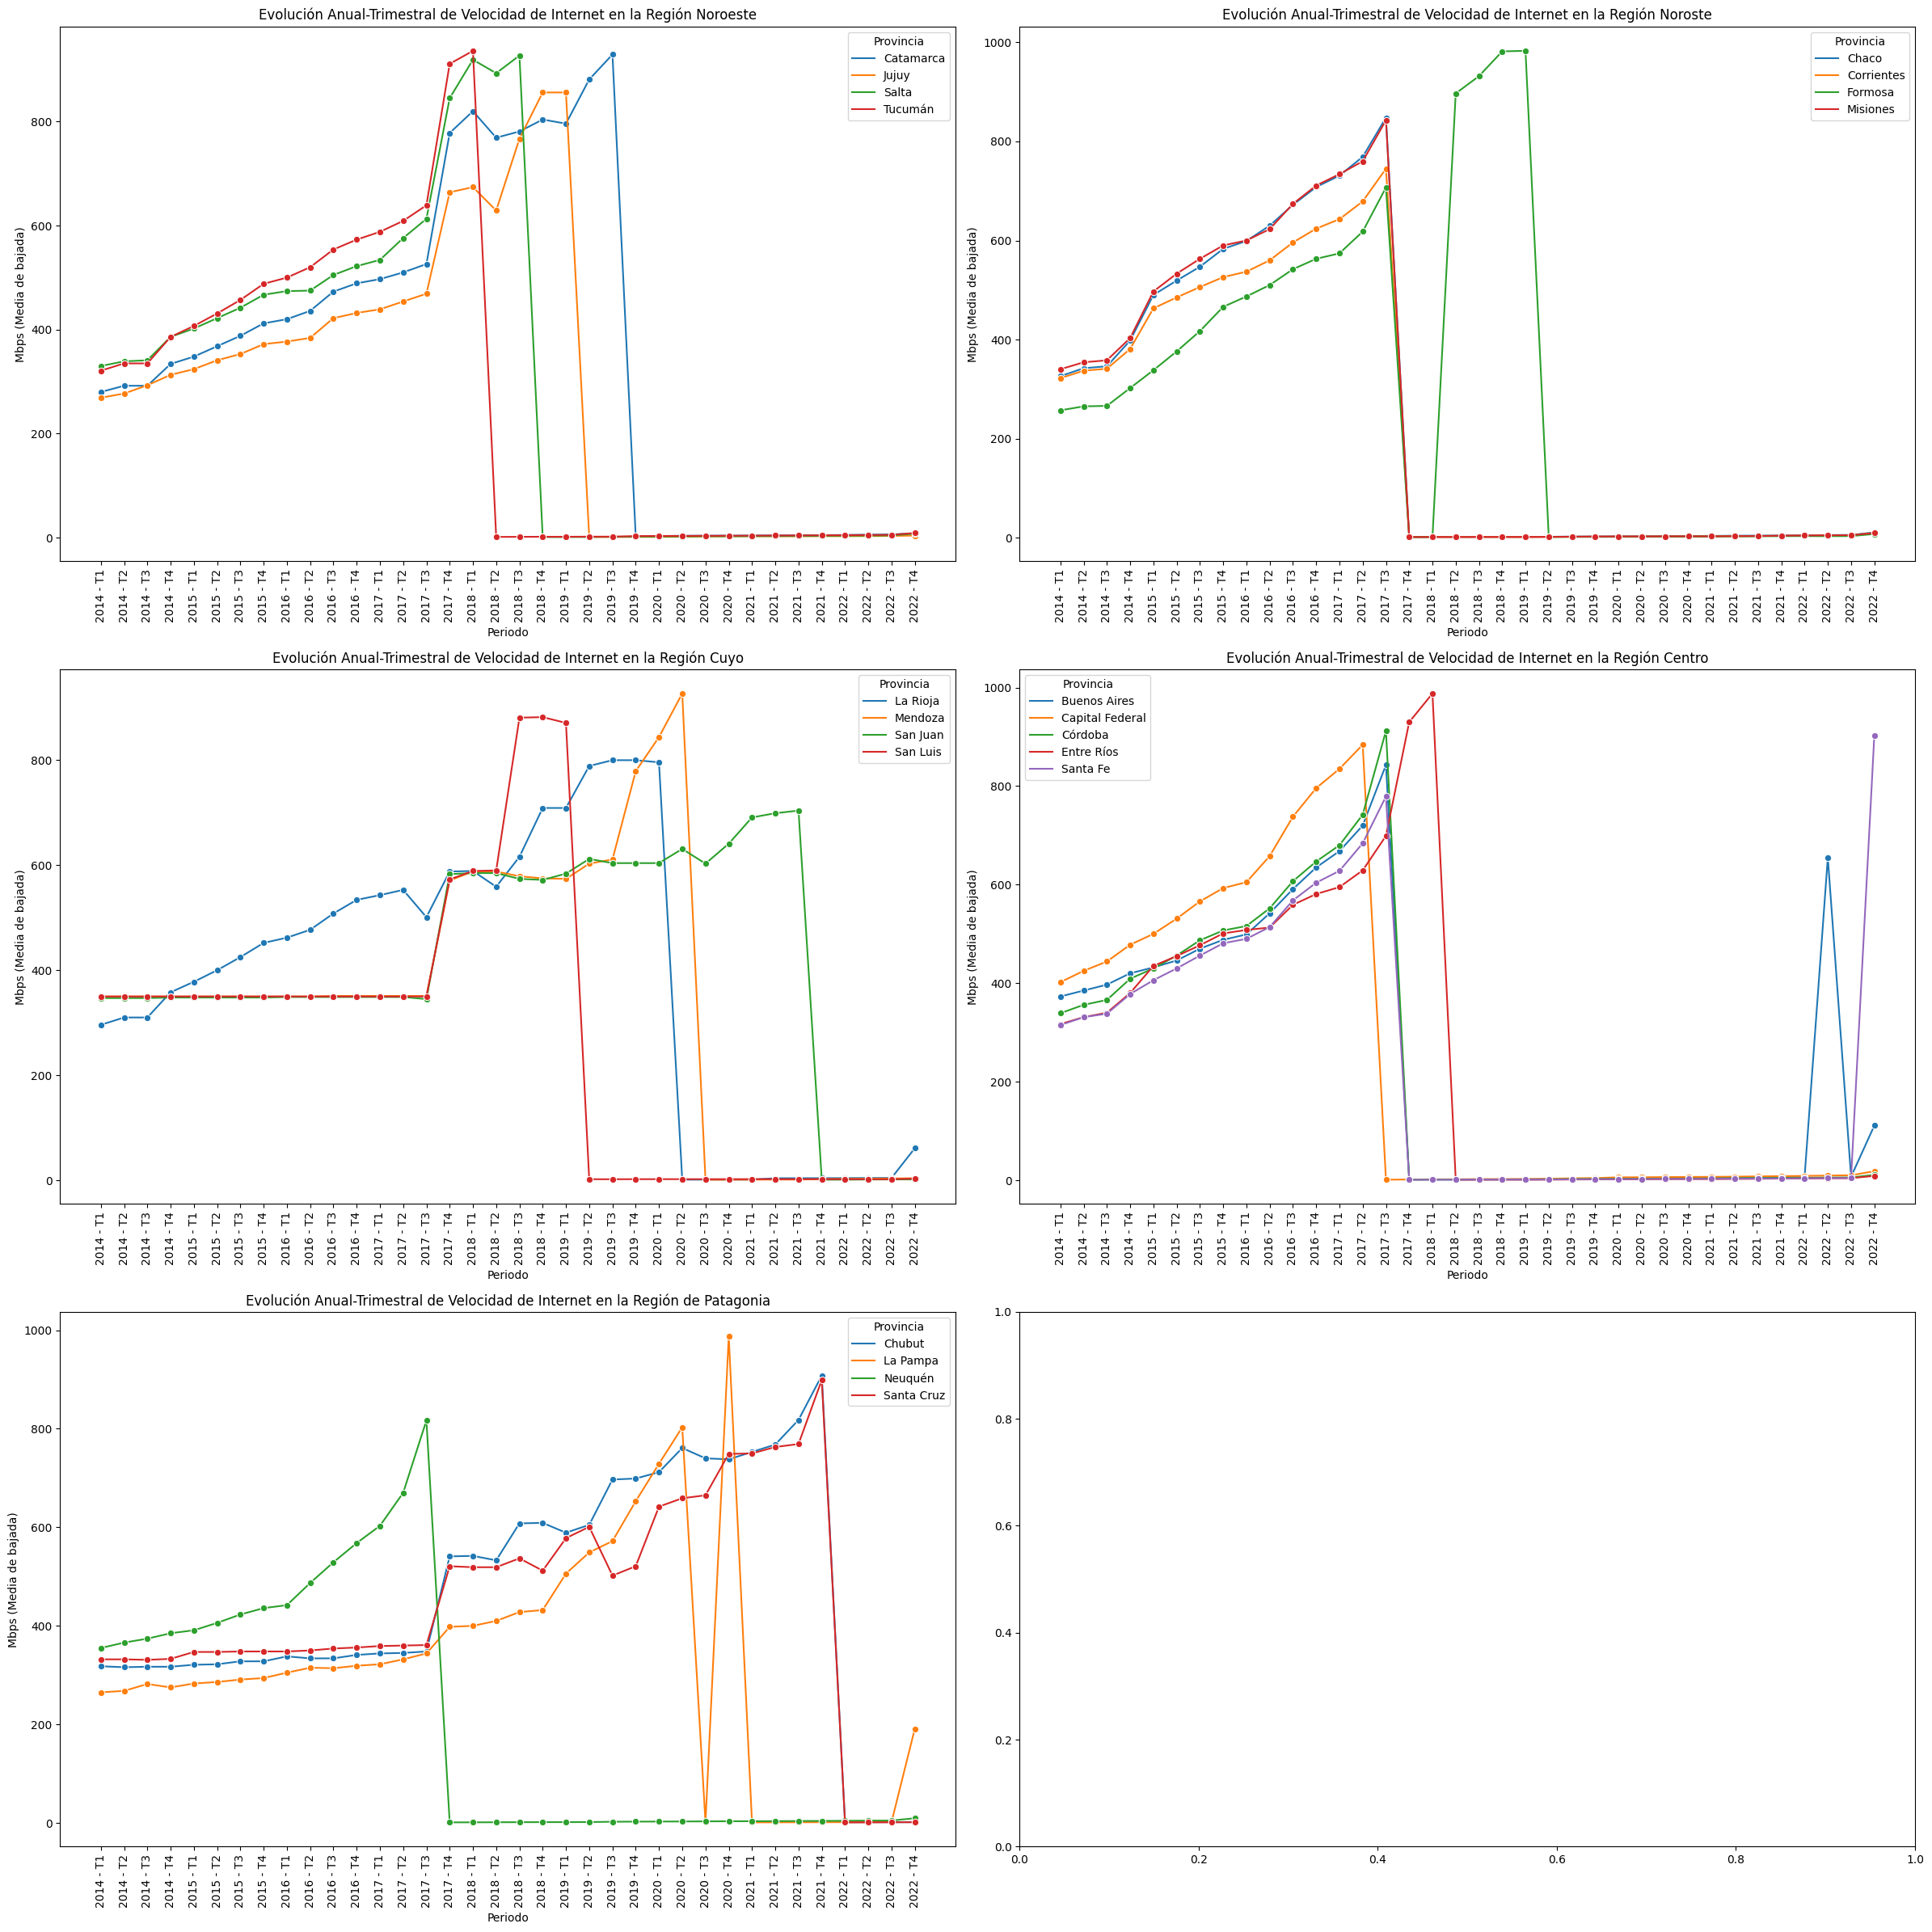

In [64]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(24, 24))

# Gráfico de línea para evolución de velocidad, Región Noroeste
sns.lineplot(data = evolucion_internet_noroeste, x ='Periodo', y ='Mbps (Media de bajada)', hue ='Provincia', marker = 'o', ax=axes[0,0])
axes[0,0].set_title('Evolución Anual-Trimestral de Velocidad de Internet en la Región Noroeste')
axes[0,0].set_xticklabels(axes[0,0].get_xticklabels(), rotation=90)

# Gráfico de línea para evolución de velocidad, Región Noreste
sns.lineplot(data = evolucion_internet_noreste, x ='Periodo', y ='Mbps (Media de bajada)', hue ='Provincia', marker = 'o', ax=axes[0,1])
axes[0,1].set_title('Evolución Anual-Trimestral de Velocidad de Internet en la Región Noroste')
axes[0,1].set_xticklabels(axes[0,1].get_xticklabels(), rotation=90)

# Gráfico de línea para evolución de velocidad, Región Cuyo
sns.lineplot(data = evolucion_internet_cuyo, x ='Periodo', y ='Mbps (Media de bajada)', hue ='Provincia', marker = 'o', ax=axes[1,0])
axes[1,0].set_title('Evolución Anual-Trimestral de Velocidad de Internet en la Región Cuyo')
axes[1,0].set_xticklabels(axes[1,0].get_xticklabels(), rotation=90)

# Gráfico de línea para evolución de velocidad, Región Centro
sns.lineplot(data = evolucion_internet_centro, x ='Periodo', y ='Mbps (Media de bajada)', hue ='Provincia', marker = 'o', ax=axes[1,1])
axes[1,1].set_title('Evolución Anual-Trimestral de Velocidad de Internet en la Región Centro')
axes[1,1].set_xticklabels(axes[1,1].get_xticklabels(), rotation=90)

# Gráfico de línea para evolución de velocidad, Región de Patagonia
sns.lineplot(data = evolucion_internet_patagonia, x ='Periodo', y ='Mbps (Media de bajada)', hue ='Provincia', marker = 'o', ax=axes[2,0])
axes[2,0].set_title('Evolución Anual-Trimestral de Velocidad de Internet en la Región de Patagonia')
axes[2,0].set_xticklabels(axes[2,0].get_xticklabels(), rotation=90)

plt.tight_layout()

plt.show()

## Distribución de los accesos totales nacionales a Internet fijo por velocidad **`acceso_total_velocidad`**

Distribución de los accesos totales nacionales a Internet fijo por velocidad de bajada

In [226]:
acceso_total_velocidad = pd.read_csv('../Telecommunications-Data-Analysis/Original datasets/9-Internet_Accesos-por-velocidad.csv')
acceso_total_velocidad.head()

,Año,Trimestre,Hasta 512 kbps,Entre 512 Kbps y 1 Mbps,Entre 1 Mbps y 6 Mbps,Entre 6 Mbps y 10 Mbps,Entre 10 Mbps y 20 Mbps,Entre 20 Mbps y 30 Mbps,Más de 30 Mbps,OTROS,Total
0,2022,4,31.981,85.668,1.075.272,1.109.421,765.015,335.573,7.410.902,394.282,11.208.114
1,2022,3,33.013,96.727,1.161.370,1.151.906,823.505,479.822,6.995.750,349.035,11.091.128
2,2022,2,33.667,99.498,1.193.090,1.197.030,856.562,485.321,6.741.922,351.594,10.958.684
3,2022,1,34.890,104.840,1.263.273,1.209.148,967.508,509.830,6.336.187,198.333,10.624.009
4,2021,4,41.262,28.521,1.413.208,1.245.333,976.539,558.358,6.032.322,194.251,10.489.794


In [227]:
acceso_total_velocidad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Año                      36 non-null     int64  
 1   Trimestre                36 non-null     int64  
 2   Hasta 512 kbps           36 non-null     float64
 3   Entre 512 Kbps y 1 Mbps  36 non-null     float64
 4   Entre 1 Mbps y 6 Mbps    36 non-null     object 
 5   Entre 6 Mbps y 10 Mbps   36 non-null     object 
 6   Entre 10 Mbps y 20 Mbps  36 non-null     object 
 7   Entre 20 Mbps y 30 Mbps  36 non-null     object 
 8   Más de 30 Mbps           36 non-null     object 
 9   OTROS                    36 non-null     float64
 10  Total                    36 non-null     object 
dtypes: float64(3), int64(2), object(6)
memory usage: 3.2+ KB


Verificamos los Años y Trimestres

In [228]:
acceso_total_velocidad['Año'].unique()

array([2022, 2021, 2020, 2019, 2018, 2017, 2016, 2015, 2014], dtype=int64)

In [229]:
acceso_total_velocidad['Trimestre'].unique()

array([4, 3, 2, 1], dtype=int64)

**Transformación de datos**

In [230]:
# Eliminamos los puntos de las columnas 'Hasta 512 kbps' y 'Entre 512 Kbps y 1 Mbps' y convertimos a entero (Ejecutar SÓLO una vez)
acceso_total_velocidad['Hasta 512 kbps'] = acceso_total_velocidad['Hasta 512 kbps'].apply(lambda x: x*1000).astype(int)
acceso_total_velocidad['Entre 512 Kbps y 1 Mbps'] = acceso_total_velocidad['Entre 512 Kbps y 1 Mbps'].apply(lambda x: x*1000).astype(int)
acceso_total_velocidad['OTROS'] = acceso_total_velocidad['OTROS'].apply(lambda x: x*1000).astype(int)

acceso_total_velocidad['Entre 1 Mbps y 6 Mbps'] = acceso_total_velocidad['Entre 1 Mbps y 6 Mbps'].str.replace('.', '').astype(int)
acceso_total_velocidad['Entre 6 Mbps y 10 Mbps'] = acceso_total_velocidad['Entre 6 Mbps y 10 Mbps'].str.replace('.', '').astype(int)
acceso_total_velocidad['Entre 10 Mbps y 20 Mbps'] = acceso_total_velocidad['Entre 10 Mbps y 20 Mbps'].str.replace('.', '').astype(int)
acceso_total_velocidad['Entre 20 Mbps y 30 Mbps'] = acceso_total_velocidad['Entre 20 Mbps y 30 Mbps'].str.replace('.', '').astype(int)
acceso_total_velocidad['Más de 30 Mbps'] = acceso_total_velocidad['Más de 30 Mbps'].str.replace('.', '').astype(int)
acceso_total_velocidad['OTROS'] = acceso_total_velocidad['OTROS'].astype(int)
acceso_total_velocidad['Total'] = acceso_total_velocidad['Total'].str.replace('.', '').astype(int)

In [231]:
# Creamos una columna 'Periodo' concatenando las columnas 'Año' y 'Trimestre'
acceso_total_velocidad['Periodo'] = acceso_total_velocidad['Año'].astype(str) + ' - T' + acceso_total_velocidad['Trimestre'].astype(str)

In [232]:
# verificamos los cambios de variables
acceso_total_velocidad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Año                      36 non-null     int64 
 1   Trimestre                36 non-null     int64 
 2   Hasta 512 kbps           36 non-null     int32 
 3   Entre 512 Kbps y 1 Mbps  36 non-null     int32 
 4   Entre 1 Mbps y 6 Mbps    36 non-null     int32 
 5   Entre 6 Mbps y 10 Mbps   36 non-null     int32 
 6   Entre 10 Mbps y 20 Mbps  36 non-null     int32 
 7   Entre 20 Mbps y 30 Mbps  36 non-null     int32 
 8   Más de 30 Mbps           36 non-null     int32 
 9   OTROS                    36 non-null     int32 
 10  Total                    36 non-null     int32 
 11  Periodo                  36 non-null     object
dtypes: int32(9), int64(2), object(1)
memory usage: 2.2+ KB


**Estadísticas**

In [233]:
acceso_total_velocidad.describe()

,Año,Trimestre,Hasta 512 kbps,Entre 512 Kbps y 1 Mbps,Entre 1 Mbps y 6 Mbps,Entre 6 Mbps y 10 Mbps,Entre 10 Mbps y 20 Mbps,Entre 20 Mbps y 30 Mbps,Más de 30 Mbps,OTROS,Total
count,36.000000,36.000000,36.000000,36.000000,3.600000e+01,3.600000e+01,3.600000e+01,3.600000e+01,3.600000e+01,36.000000,3.600000e+01
mean,2018.000000,2.500000,49571.638889,239046.083333,3.552501e+06,9.034036e+05,9.147367e+05,4.990417e+05,2.053382e+06,126059.500000,8.337742e+06
std,2.618615,1.133893,52406.958667,198205.544715,1.342734e+06,2.453029e+05,4.818186e+05,4.658192e+05,2.498904e+06,120429.285661,1.504414e+06
min,2014.000000,1.000000,5675.000000,28521.000000,1.075272e+06,2.891820e+05,1.011270e+05,3.450000e+02,1.159500e+04,0.000000,6.272846e+06
25%,2016.000000,1.750000,28412.500000,74491.750000,2.634148e+06,7.884982e+05,6.803692e+05,6.239875e+04,2.761000e+04,0.000000,7.085635e+06
50%,2018.000000,2.500000,38879.500000,216701.500000,3.415018e+06,9.781860e+05,8.111225e+05,4.975755e+05,4.845840e+05,155810.000000,8.228740e+06
75%,2020.000000,3.250000,41184.000000,389368.250000,4.970678e+06,1.065288e+06,1.139898e+06,6.358098e+05,4.099905e+06,199011.250000,9.410040e+06
max,2022.000000,4.000000,241713.000000,687619.000000,5.153437e+06,1.245333e+06,2.068087e+06,1.688748e+06,7.410902e+06,394282.000000,1.120811e+07


**Observaciones**

- En promedio, la mayoría de los accesos nacionales a Internet fijo están en el rango de velocidad de 1 Mbps a 6 Mbps, con una media de 3.5 millones de accesos trimestrales. La velocidad más baja (hasta 512 kbps) tiene una media significativa de 49 mil accesos trimestrales.

- La velocidad de acceso más alta (más de 30 Mbps) tiene una media de 2 millones de accesos trimestrales, que es significativamente menor que la media de los accesos en el rango de velocidad de 1 Mbps a 6 Mbps con 3.5 millones.

- Estos datos indican que la mayoría de los accesos nacionales a Internet fijo en Argentina tienen velocidades de acceso en el rango de 1 Mbps a 6 Mbps, y que la cantidad de accesos totales nacionales ha aumentado significativamente con el tiempo.

**Análisis**

1. Gráficos de barras y boxplot de cada velocidad

**`Hasta 512 kbps`**, **`Entre 512 Kbps y 1 Mbps`**, **`Entre 1 Mbps y 6 Mbps`**, **`Entre 6 Mbps y 10 Mbps`**

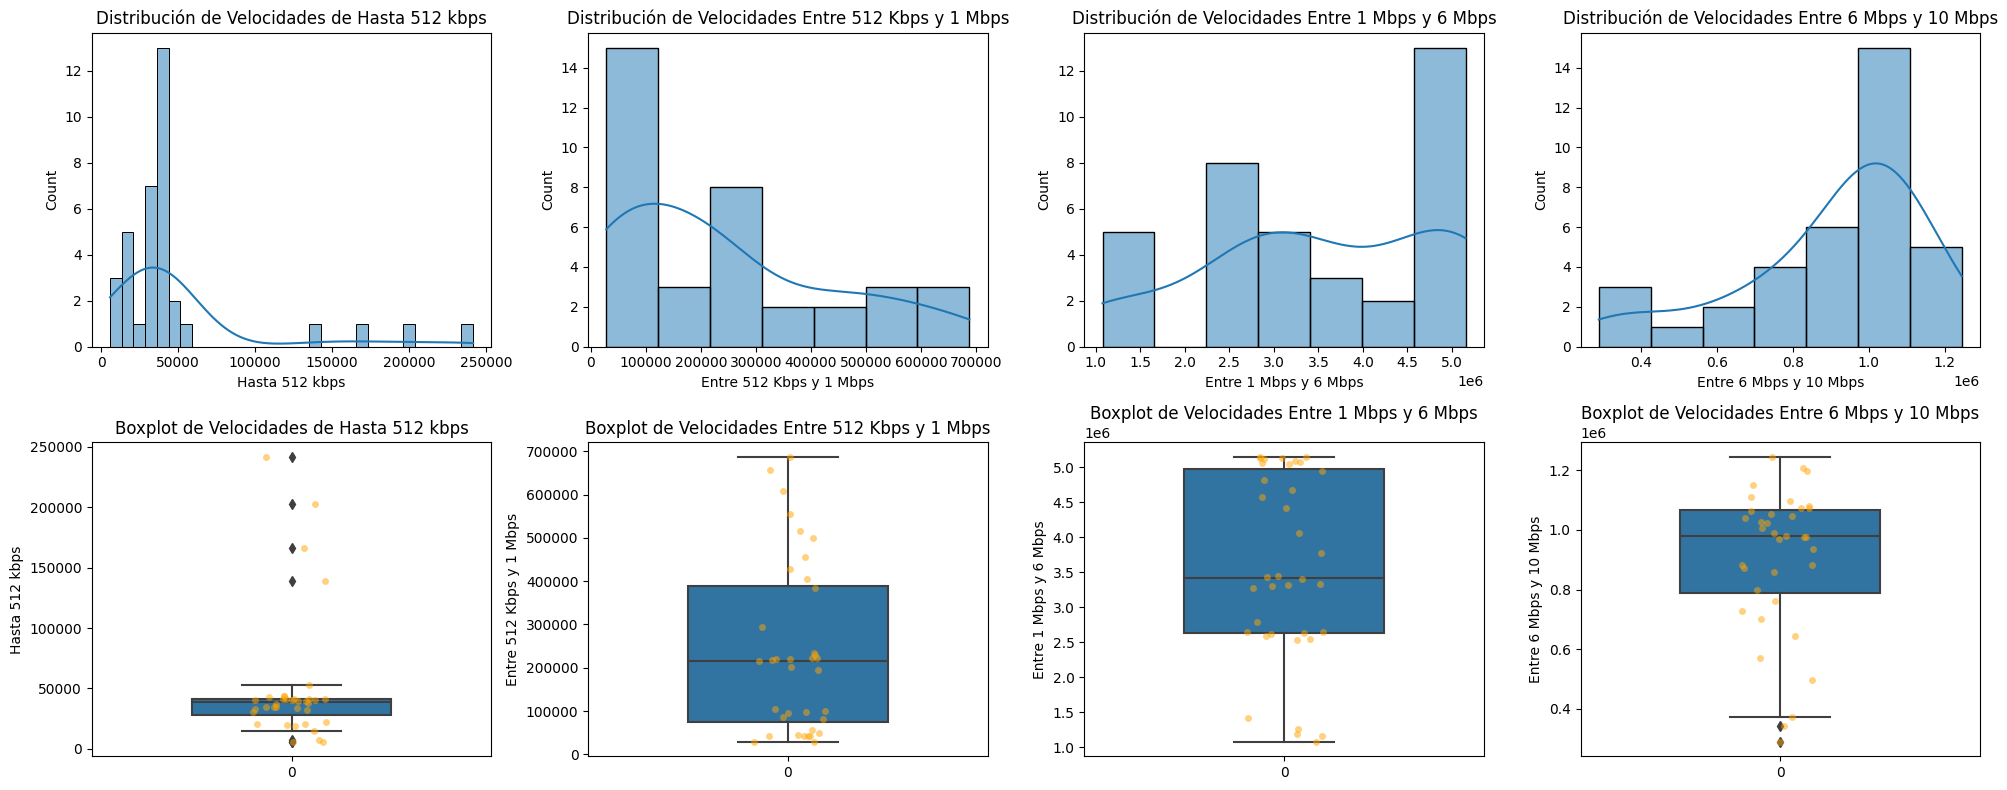

In [253]:
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(20, 8))

# Gráfico de barras para velocidad de Hasta 512 kbps
sns.histplot(data = acceso_total_velocidad, x ='Hasta 512 kbps', kde=True, ax=axes[0,0])
axes[0,0].set_title('Distribución de Velocidades de Hasta 512 kbps')

# Boxplot de velocidades de Hasta 512 kbps
sns.boxplot(data=acceso_total_velocidad['Hasta 512 kbps'], width=0.5, ax=axes[1,0])
# Gráfico de dispersión de velocidades de Hasta 512 kbps
sns.stripplot(data=acceso_total_velocidad['Hasta 512 kbps'], color='orange', alpha= 0.5, ax=axes[1,0])
axes[1,0].set_title('Boxplot de Velocidades de Hasta 512 kbps')


# Gráfico de barras para velocidades Entre 512 Kbps y 1 Mbps
sns.histplot(data = acceso_total_velocidad, x ='Entre 512 Kbps y 1 Mbps', kde=True, ax=axes[0,1])
axes[0,1].set_title('Distribución de Velocidades Entre 512 Kbps y 1 Mbps')

# Boxplot de velocidades Entre 512 Kbps y 1 Mbps
sns.boxplot(data=acceso_total_velocidad['Entre 512 Kbps y 1 Mbps'], width=0.5, ax=axes[1,1])
# Gráfico de dispersión de velocidades Entre 512 Kbps y 1 Mbps
sns.stripplot(data=acceso_total_velocidad['Entre 512 Kbps y 1 Mbps'], color='orange', alpha= 0.5, ax=axes[1,1])
axes[1,1].set_title('Boxplot de Velocidades Entre 512 Kbps y 1 Mbps')


# Gráfico de barras para velocidades Entre 1 Mbps y 6 Mbps
sns.histplot(data = acceso_total_velocidad, x ='Entre 1 Mbps y 6 Mbps', kde=True, ax=axes[0,2])
axes[0,2].set_title('Distribución de Velocidades Entre 1 Mbps y 6 Mbps')

# Boxplot de velocidades Entre 1 Mbps y 6 Mbps
sns.boxplot(data=acceso_total_velocidad['Entre 1 Mbps y 6 Mbps'], width=0.5, ax=axes[1,2])
# Gráfico de dispersión de velocidades Entre 1 Mbps y 6 Mbps
sns.stripplot(data=acceso_total_velocidad['Entre 1 Mbps y 6 Mbps'], color='orange', alpha= 0.5, ax=axes[1,2])
axes[1,2].set_title('Boxplot de Velocidades Entre 1 Mbps y 6 Mbps')


# Gráfico de barras para velocidades Entre 6 Mbps y 10 Mbps
sns.histplot(data = acceso_total_velocidad, x ='Entre 6 Mbps y 10 Mbps', kde=True, ax=axes[0,3])
axes[0,3].set_title('Distribución de Velocidades Entre 6 Mbps y 10 Mbps')

# Boxplot de velocidades Entre 6 Mbps y 10 Mbps
sns.boxplot(data=acceso_total_velocidad['Entre 6 Mbps y 10 Mbps'], width=0.5, ax=axes[1,3])
# Gráfico de dispersión de velocidades Entre 6 Mbps y 10 Mbps
sns.stripplot(data=acceso_total_velocidad['Entre 6 Mbps y 10 Mbps'], color='orange', alpha= 0.5, ax=axes[1,3])
axes[1,3].set_title('Boxplot de Velocidades Entre 6 Mbps y 10 Mbps')

plt.tight_layout()

plt.show()

**`Entre 10 Mbps y 20 Mbps`**, **`Entre 20 Mbps y 30 Mbps`**, **`Más de 30 Mbps`**, **`OTROS`**

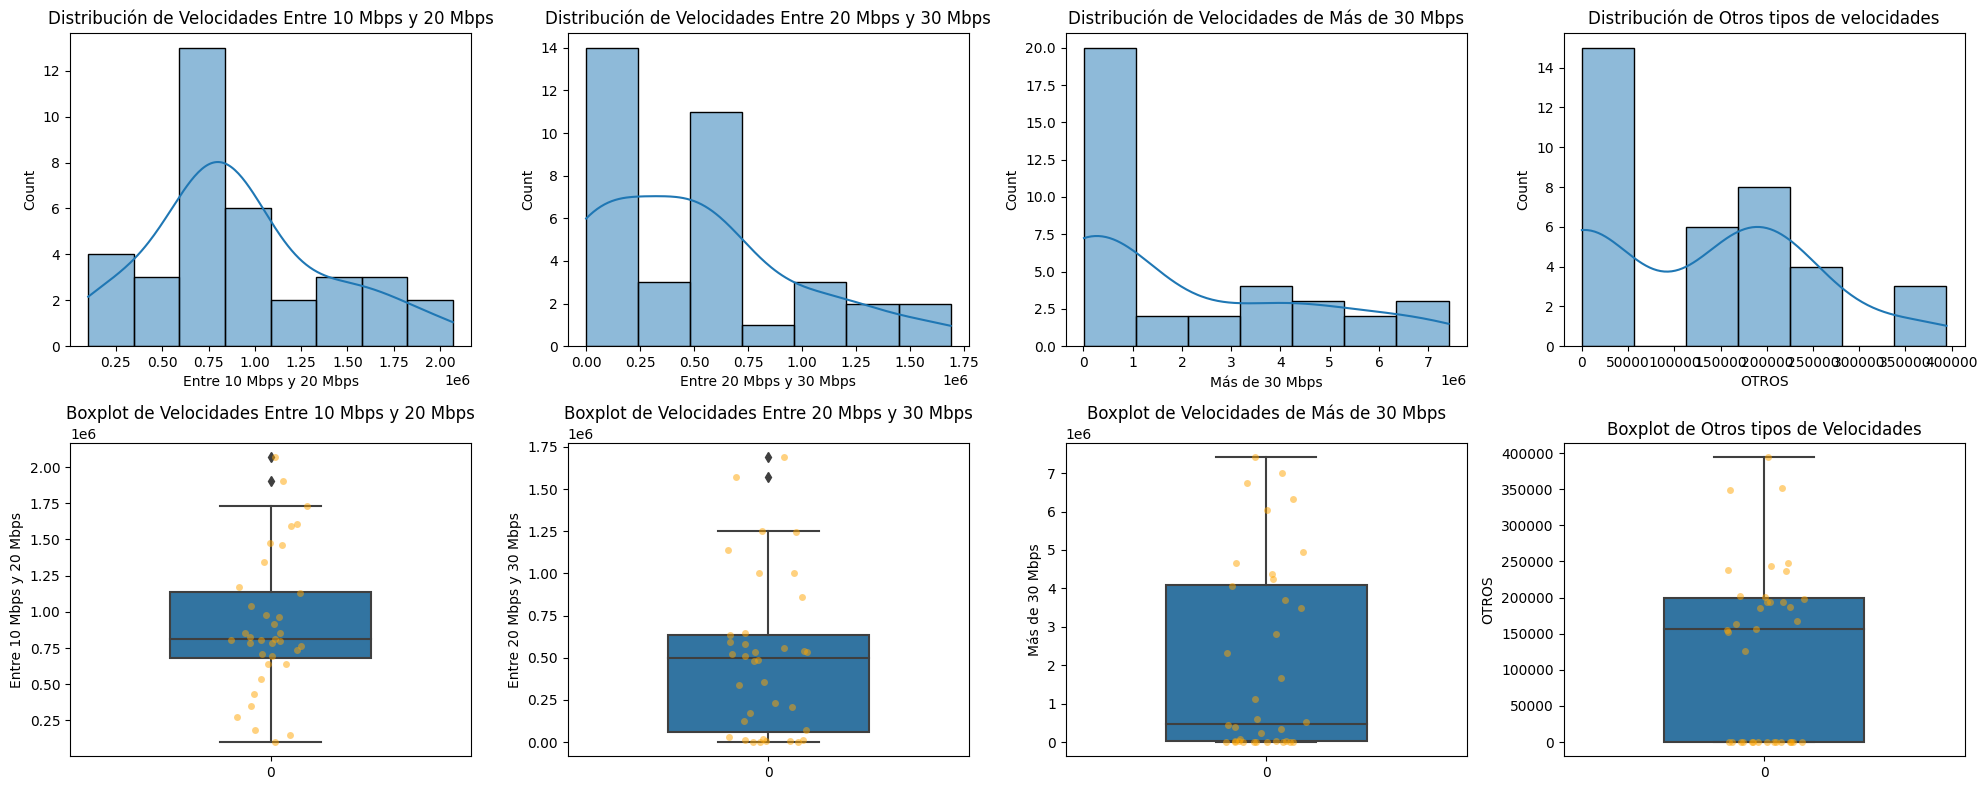

In [254]:
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(20, 8))

# Gráfico de barras para velocidad Entre 10 Mbps y 20 Mbps
sns.histplot(data = acceso_total_velocidad, x ='Entre 10 Mbps y 20 Mbps', kde=True, ax=axes[0,0])
axes[0,0].set_title('Distribución de Velocidades Entre 10 Mbps y 20 Mbps')

# Boxplot de velocidades Entre 10 Mbps y 20 Mbps
sns.boxplot(data=acceso_total_velocidad['Entre 10 Mbps y 20 Mbps'], width=0.5, ax=axes[1,0])
# Gráfico de dispersión de velocidades Entre 10 Mbps y 20 Mbps
sns.stripplot(data=acceso_total_velocidad['Entre 10 Mbps y 20 Mbps'], color='orange', alpha= 0.5, ax=axes[1,0])
axes[1,0].set_title('Boxplot de Velocidades Entre 10 Mbps y 20 Mbps')


# Gráfico de barras para velocidades Entre 20 Mbps y 30 Mbps
sns.histplot(data = acceso_total_velocidad, x ='Entre 20 Mbps y 30 Mbps', kde=True, ax=axes[0,1])
axes[0,1].set_title('Distribución de Velocidades Entre 20 Mbps y 30 Mbps')

# Boxplot de velocidades Entre 20 Mbps y 30 Mbps
sns.boxplot(data=acceso_total_velocidad['Entre 20 Mbps y 30 Mbps'], width=0.5, ax=axes[1,1])
# Gráfico de dispersión de velocidades Entre 20 Mbps y 30 Mbps
sns.stripplot(data=acceso_total_velocidad['Entre 20 Mbps y 30 Mbps'], color='orange', alpha= 0.5, ax=axes[1,1])
axes[1,1].set_title('Boxplot de Velocidades Entre 20 Mbps y 30 Mbps')


# Gráfico de barras para velocidades de Más de 30 Mbps
sns.histplot(data = acceso_total_velocidad, x ='Más de 30 Mbps', kde=True, ax=axes[0,2])
axes[0,2].set_title('Distribución de Velocidades de Más de 30 Mbps')

# Boxplot de velocidades de Más de 30 Mbps
sns.boxplot(data=acceso_total_velocidad['Más de 30 Mbps'], width=0.5, ax=axes[1,2])
# Gráfico de dispersión de velocidades de Más de 30 Mbps
sns.stripplot(data=acceso_total_velocidad['Más de 30 Mbps'], color='orange', alpha= 0.5, ax=axes[1,2])
axes[1,2].set_title('Boxplot de Velocidades de Más de 30 Mbps')


# Gráfico de barras para Otros tipos de velocidades
sns.histplot(data = acceso_total_velocidad, x ='OTROS', kde=True, ax=axes[0,3])
axes[0,3].set_title('Distribución de Otros tipos de velocidades')

# Boxplot para Otros tipos de velocidades
sns.boxplot(data=acceso_total_velocidad['OTROS'], width=0.5, ax=axes[1,3])
# Gráfico de dispersión de Otros tipos de velocidades
sns.stripplot(data=acceso_total_velocidad['OTROS'], color='orange', alpha= 0.5, ax=axes[1,3])
axes[1,3].set_title('Boxplot de Otros tipos de Velocidades')

plt.tight_layout()

plt.show()

**Observaciones**

- Para velocidades de hasta 512 Kbps, la distribución indica que hay años donde la mayor cantidad de accesos al internet fijo estuvo alrededor de los 50 mil. Sin embargo, el sesgo hacia la derecha sugiere que en años siguientes la cantidad de accesos a través de estas velocidades comenzó a disminuir.

- Las velocidades de 512 Kpbs hasta 1 Mbps presenta una distribución menos sesgada y con mayor cantidad de accesos al internet fijo entre los 200 mil.

- En las velocidades de 1 Mpbs hasta 6 Mbps; la distribución presenta un leve sesgo hacia a la izquierda, esto inidca que hay una mayor cantidad de accesos a internet fijo superando los 3 millones.

- En el caso de las velocidades de 6 Mbps hasta los 10 Mbps, se observa un sesgo hacia la izquierda que puede deberse a que en los primeros años de este conjunto de datos existía muy poco acceso al internet fijo a través de estas velocidades, y que con el transcurso del tiempo estas velocidades fueron más requeridas, superando el millón de accesos.

- Las velocidades de 10 Mbps hasta 20 Mbps presenta una distribución sesgada hacia la derecha. Dado que la cantidad de accesos para determinados años superó los 2 millones.

- Las velocidades de 20 Mpbs hasta 30 Mbps; a pesar de presentar un sesgo hacia la derecha, la mayor cantidad de acceso supera los 500 mil. Esto puede deberse a las siguientes razones: las otras velocidades tienen un precio más accesible para la mayoría de los hogares, hay menos demanda para velocidades superiores a los 20 Mbps o la infraestructura de internet en algunas áreas no es capaz de soportar velocidades de transferencia de datos superiores a los 20 Mbps. Lo mismo sucede para velocidades superiores a 30 Mbps.

**`Total`**

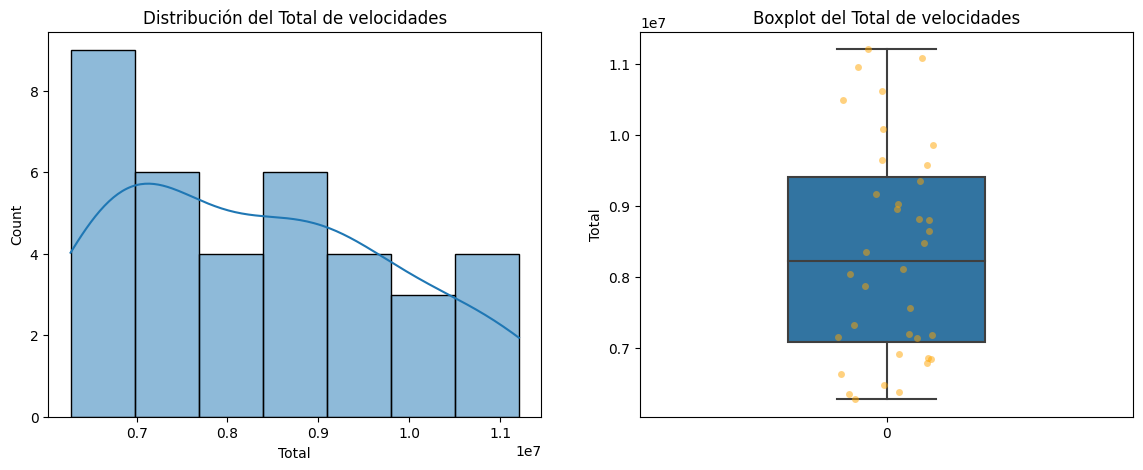

In [252]:
# Graficamos ambos DFs
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(14, 5))

# Gráfico de barras para el Total de velocidades
sns.histplot(data = acceso_total_velocidad, x ='Total', kde=True, ax=ax1)
ax1.set_title('Distribución del Total de velocidades')

# Boxplot para el Total de velocidades
sns.boxplot(data=acceso_total_velocidad['Total'], width=0.4, ax=ax2)
# Gráfico de dispersión de Otros tipos de velocidades
sns.stripplot(data=acceso_total_velocidad['Total'], color='orange', alpha= 0.5, ax=ax2)
ax2.set_title('Boxplot del Total de velocidades')

plt.show()

**Observaciones**
- Para el total de los accesos al servicio de internet fijo, la distribución de refleja que estos han aumentado significativamente con el tiempo.

2. **Año**, **Trimestre** vs *Velocidades*

## **`internet_por_vel_prov`**
Número de accesos al servicio de Internet fijo por velocidad de bajada en cada provincia

In [121]:
internet_por_vel_prov = pd.read_csv('../Telecommunications-Data-Analysis/Original datasets/11-Accesos_a_Internet_fijo_por_velocidad_de_bajada_y_provincia.csv')
internet_por_vel_prov

,Año,Trimestre,Provincia,Otros,"0,256 Mbps","0,375 Mbps","0,625 Mbps","0,5 Mbps","0,512 Mbps","0,75 Mbps",...,63 Mbps,64 Mbps,65 Mbps,66 Mbps,67 Mbps,68 Mbps,70 Mbps,71 Mbps,75 Mbps,77 Mbps
0,2022.0,4.0,Buenos Aires,97.634,18,- 0,- 0,28.724,192,4.611,...,- 0,- 0,14,- 0,- 0,- 0,5.655,- 0,90.796,- 0
1,2022.0,4.0,Capital Federal,106.772,31,- 0,- 0,451.000,34,1.307,...,- 0,- 0,- 0,1,- 0,- 0,15,- 0,28.406,- 0
2,2022.0,4.0,Catamarca,2.280,- 0,- 0,- 0,34.000,37,- 0,...,- 0,- 0,- 0,- 0,- 0,- 0,- 0,- 0,- 0,- 0
3,2022.0,4.0,Chaco,3.909,- 0,225,111,234.000,2,- 0,...,- 0,- 0,- 0,- 0,- 0,- 0,- 0,- 0,- 0,- 0
4,2022.0,4.0,Chubut,20.026,8,- 0,- 0,69.000,32,836,...,- 0,- 0,- 0,- 0,- 0,- 0,- 0,- 0,- 0,- 0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
500,2017.0,4.0,Santa Fe,14.119,- 0,- 0,- 0,3.109,- 0,7.637,...,- 0,- 0,- 0,- 0,- 0,- 0,- 0,- 0,- 0,- 0
501,2017.0,4.0,Santiago Del Estero,- 0,- 0,- 0,- 0,41.000,- 0,909,...,- 0,- 0,- 0,- 0,- 0,- 0,- 0,- 0,- 0,- 0
502,2017.0,4.0,Tierra Del Fuego,- 0,- 0,- 0,- 0,6.000,- 0,282,...,- 0,- 0,- 0,- 0,- 0,- 0,- 0,- 0,- 0,- 0
503,2017.0,4.0,Tucumán,- 0,- 0,- 0,- 0,105.000,- 0,1,...,- 0,- 0,- 0,- 0,- 0,- 0,- 0,- 0,- 0,- 0


Eliminamos valores nulos

In [10]:
internet_por_vel_prov.dropna(inplace=True)

In [11]:
# Se observa la información de cada columna
internet_por_vel_prov.info()

<class 'pandas.core.frame.DataFrame'>
Index: 504 entries, 0 to 503
Data columns (total 97 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Año         504 non-null    float64
 1   Trimestre   504 non-null    float64
 2   Provincia   504 non-null    object 
 3   Otros       504 non-null    object 
 4   0,256 Mbps  504 non-null    object 
 5   0,375 Mbps  504 non-null    object 
 6   0,625 Mbps  504 non-null    object 
 7   0,5 Mbps    504 non-null    float64
 8   0,512 Mbps  504 non-null    object 
 9   0,75 Mbps   504 non-null    object 
 10  1 Mbps      504 non-null    object 
 11  1,2 Mbps    504 non-null    object 
 12  1,25 Mbps   504 non-null    object 
 13  1,5 Mbps    504 non-null    object 
 14  2 Mbps      504 non-null    object 
 15  2,2 Mbps    504 non-null    object 
 16  2,5 Mbps    504 non-null    object 
 17  6,7 Mbps    504 non-null    object 
 18  3 Mbps      504 non-null    float64
 19  3,2 Mbps    504 non-null    object

Según la información de la tabla, las columnas **Año** y **Trimestre** son de tipo flotante cuando deben ser de tipo entero. Las columnas de tipos de servicios son de tipo str con tipos flotantes entre ellos. Así que transformamos todos estos tipos de datos mencionados.

In [12]:
# transformamos las columnas Año y Trimestre a entero
internet_por_vel_prov['Año'] = internet_por_vel_prov['Año'].astype(int)
internet_por_vel_prov['Trimestre'] = internet_por_vel_prov['Trimestre'].astype(int)

In [13]:
# Para las columnas; a partir de la cuarta, eliminamos los guiones, y las comas lo reemplazamos por puntos; en aquellas columnas de tipo str
for columna in internet_por_vel_prov.columns[3:]:
    if internet_por_vel_prov[columna].dtype == object:
        internet_por_vel_prov[columna] = internet_por_vel_prov[columna].str.replace('- ', '')
        internet_por_vel_prov[columna] = internet_por_vel_prov[columna].str.replace(',', '.')

In [14]:
# Transformamos las columnas anteriores a tipo numerico
for columna in internet_por_vel_prov.columns[3:]:
    internet_por_vel_prov[columna] =pd.to_numeric(internet_por_vel_prov[columna], errors='coerce').fillna(0)

internet_por_vel_prov.head()

,Año,Trimestre,Provincia,Otros,"0,256 Mbps","0,375 Mbps","0,625 Mbps","0,5 Mbps","0,512 Mbps","0,75 Mbps",...,63 Mbps,64 Mbps,65 Mbps,66 Mbps,67 Mbps,68 Mbps,70 Mbps,71 Mbps,75 Mbps,77 Mbps
0,2022,4,Buenos Aires,97.634,18,0,0,28.724,192,4.611,...,0,0,14,0,0,0,5.655,0,90.796,0
1,2022,4,Capital Federal,106.772,31,0,0,451.000,34,1.307,...,0,0,0,1,0,0,15.000,0,28.406,0
2,2022,4,Catamarca,2.280,0,0,0,34.000,37,0.000,...,0,0,0,0,0,0,0.000,0,0.000,0
3,2022,4,Chaco,3.909,0,225,111,234.000,2,0.000,...,0,0,0,0,0,0,0.000,0,0.000,0
4,2022,4,Chubut,20.026,8,0,0,69.000,32,836.000,...,0,0,0,0,0,0,0.000,0,0.000,0


In [15]:
internet_por_vel_prov.info()

<class 'pandas.core.frame.DataFrame'>
Index: 504 entries, 0 to 503
Data columns (total 97 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Año         504 non-null    int32  
 1   Trimestre   504 non-null    int32  
 2   Provincia   504 non-null    object 
 3   Otros       504 non-null    float64
 4   0,256 Mbps  504 non-null    int64  
 5   0,375 Mbps  504 non-null    int64  
 6   0,625 Mbps  504 non-null    int64  
 7   0,5 Mbps    504 non-null    float64
 8   0,512 Mbps  504 non-null    int64  
 9   0,75 Mbps   504 non-null    float64
 10  1 Mbps      504 non-null    float64
 11  1,2 Mbps    504 non-null    int64  
 12  1,25 Mbps   504 non-null    int64  
 13  1,5 Mbps    504 non-null    float64
 14  2 Mbps      504 non-null    float64
 15  2,2 Mbps    504 non-null    int64  
 16  2,5 Mbps    504 non-null    float64
 17  6,7 Mbps    504 non-null    int64  
 18  3 Mbps      504 non-null    float64
 19  3,2 Mbps    504 non-null    int64 

## Accesos a Internet fijo por tecnología y localidad **`internet_por_tech_loc`**
Número de accesos al servicio de Internet fijo por tecnología en cada localidad declarada

In [119]:
internet_por_tech_loc = pd.read_csv('../Telecommunications-Data-Analysis/Original datasets/14-Accesos_a_Internet_fijo_por_tecnologia_y_localidad.csv')
internet_por_tech_loc

,Provincia,Partido,Localidad,Link Indec,ADSL,CABLEMODEM,DIAL UP,FIBRA OPTICA,OTROS,SATELITAL,WIMAX,WIRELESS,Total general,Unnamed: 13
0,BUENOS AIRES,25 de Mayo,25 de Mayo,6854100,874,"4,54",- 0,3,- 0,852,- 0,706,"6,98",NaN
1,BUENOS AIRES,25 de Mayo,Del Valle,6854020,181,- 0,- 0,- 0,10,1,- 0,- 0,192,NaN
2,BUENOS AIRES,25 de Mayo,Gobernador Ugarte,6854040,- 0,- 0,- 0,- 0,- 0,- 0,- 0,181,181,NaN
3,BUENOS AIRES,25 de Mayo,Norberto de la Riestra,6854060,- 0,782,- 0,6,167,- 0,- 0,327,"1,28",NaN
4,BUENOS AIRES,25 de Mayo,Lucas Monteverde,6854050,- 0,- 0,- 0,- 0,- 0,- 0,- 0,6,6,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3132,TUCUMAN,Tafí Viejo,Villa Mariano Moreno - El Colmenar,90105100,- 0,31,- 0,"3,73",- 0,- 0,- 0,- 0,"3,76",NaN
3133,TUCUMAN,Trancas,San Pedro de Colalao,90112020,- 0,- 0,- 0,- 0,- 0,- 0,- 0,313,313,NaN
3134,TUCUMAN,Trancas,Villa de Trancas,90112030,126,- 0,- 0,- 0,33,- 0,- 0,101,260,NaN
3135,TUCUMAN,Yerba Buena,Villa Carmela,90119020,"1,5",- 0,- 0,- 0,1,- 0,- 0,97,"1,6",NaN


Eliminamos la última columna

In [4]:
internet_por_tech_loc = internet_por_tech_loc.iloc[:, 0:13]
internet_por_tech_loc.head()

,Provincia,Partido,Localidad,Link Indec,ADSL,CABLEMODEM,DIAL UP,FIBRA OPTICA,OTROS,SATELITAL,WIMAX,WIRELESS,Total general
0,BUENOS AIRES,25 de Mayo,25 de Mayo,6854100,874,"4,54",- 0,3,- 0,852,- 0,706,"6,98"
1,BUENOS AIRES,25 de Mayo,Del Valle,6854020,181,- 0,- 0,- 0,10,1,- 0,- 0,192
2,BUENOS AIRES,25 de Mayo,Gobernador Ugarte,6854040,- 0,- 0,- 0,- 0,- 0,- 0,- 0,181,181
3,BUENOS AIRES,25 de Mayo,Norberto de la Riestra,6854060,- 0,782,- 0,6,167,- 0,- 0,327,"1,28"
4,BUENOS AIRES,25 de Mayo,Lucas Monteverde,6854050,- 0,- 0,- 0,- 0,- 0,- 0,- 0,6,6


Reemplazamos valores

In [5]:
# Para las columnas a partir de la quinta, eliminamos los guiones, y las comas lo reemplazamos por puntos

for columna in internet_por_tech_loc.columns[4:]:
    internet_por_tech_loc[columna] = internet_por_tech_loc[columna].str.replace('- ', '')
    internet_por_tech_loc[columna] = internet_por_tech_loc[columna].str.replace(',', '.')

internet_por_tech_loc.head()

,Provincia,Partido,Localidad,Link Indec,ADSL,CABLEMODEM,DIAL UP,FIBRA OPTICA,OTROS,SATELITAL,WIMAX,WIRELESS,Total general
0,BUENOS AIRES,25 de Mayo,25 de Mayo,6854100,874,4.54,0,3,0,852,0,706,6.98
1,BUENOS AIRES,25 de Mayo,Del Valle,6854020,181,0,0,0,10,1,0,0,192
2,BUENOS AIRES,25 de Mayo,Gobernador Ugarte,6854040,0,0,0,0,0,0,0,181,181
3,BUENOS AIRES,25 de Mayo,Norberto de la Riestra,6854060,0,782,0,6,167,0,0,327,1.28
4,BUENOS AIRES,25 de Mayo,Lucas Monteverde,6854050,0,0,0,0,0,0,0,6,6


Cambiamos el tipo de dato

In [6]:
for columna in internet_por_tech_loc.columns[4:]:
    internet_por_tech_loc[columna] =pd.to_numeric(internet_por_tech_loc[columna], errors='coerce').fillna(0)

internet_por_tech_loc.head()

,Provincia,Partido,Localidad,Link Indec,ADSL,CABLEMODEM,DIAL UP,FIBRA OPTICA,OTROS,SATELITAL,WIMAX,WIRELESS,Total general
0,BUENOS AIRES,25 de Mayo,25 de Mayo,6854100,874.0,4.54,0.0,3.0,0.0,852,0,706.0,6.98
1,BUENOS AIRES,25 de Mayo,Del Valle,6854020,181.0,0.00,0.0,0.0,10.0,1,0,0.0,192.00
2,BUENOS AIRES,25 de Mayo,Gobernador Ugarte,6854040,0.0,0.00,0.0,0.0,0.0,0,0,181.0,181.00
3,BUENOS AIRES,25 de Mayo,Norberto de la Riestra,6854060,0.0,782.00,0.0,6.0,167.0,0,0,327.0,1.28
4,BUENOS AIRES,25 de Mayo,Lucas Monteverde,6854050,0.0,0.00,0.0,0.0,0.0,0,0,6.0,6.00


In [7]:
internet_por_tech_loc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3137 entries, 0 to 3136
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Provincia      3137 non-null   object 
 1   Partido        3137 non-null   object 
 2   Localidad      3137 non-null   object 
 3   Link Indec     3137 non-null   object 
 4   ADSL           3137 non-null   float64
 5   CABLEMODEM     3137 non-null   float64
 6   DIAL UP        3137 non-null   float64
 7   FIBRA OPTICA   3137 non-null   float64
 8   OTROS          3137 non-null   float64
 9   SATELITAL      3137 non-null   int64  
 10  WIMAX          3137 non-null   int64  
 11  WIRELESS       3137 non-null   float64
 12  Total general  3137 non-null   float64
dtypes: float64(7), int64(2), object(4)
memory usage: 318.7+ KB


Verificamos la columna **Provincia**

In [8]:
internet_por_tech_loc['Provincia'].unique()

array(['BUENOS AIRES', 'CABA', 'CATAMARCA', 'CHACO', 'CHUBUT', 'CORDOBA',
       'CORRIENTES', 'ENTRE RIOS', 'FORMOSA', 'JUJUY', 'LA PAMPA',
       'LA RIOJA', 'MENDOZA', 'MISIONES', 'NEUQUEN', 'RIO NEGRO', 'SALTA',
       'SAN JUAN', 'SAN LUIS', 'SANTA CRUZ', 'SANTA FE',
       'SANTIAGO DEL ESTERO', 'TIERRA DEL FUEGO', 'TUCUMAN'], dtype=object)

## Listado de localidades con conectividad a internet **`localidades_conectadas`**

Listado de localidades con conectividad a internet, con detalle por tipo de conexión.

In [12]:
localidades_conectadas = pd.read_csv('../Telecommunications-Data-Analysis/Original datasets/15-Listado_de_localidades_con_conectividad_a_internet.csv')
localidades_conectadas

,Provincia,Partido,Localidad,ADSL,Cablemódem,Dial Up,Fibra óptica,4G,3G,Telefonía Fija,Wireless,Satelital
0,BUENOS AIRES,9 de Julio,Alfredo Demarchi (Est. Facundo Quiroga),SI,--,--,--,SI,SI,SI,--,--
1,BUENOS AIRES,9 de Julio,Carlos María Naón,--,--,--,--,SI,SI,SI,--,--
2,BUENOS AIRES,9 de Julio,Dudignac,--,--,SI,--,SI,SI,SI,SI,--
3,BUENOS AIRES,9 de Julio,La Aurora (Est. La Niña),--,--,--,--,SI,--,--,--,--
4,BUENOS AIRES,9 de Julio,Manuel B. Gonnet (Est. French),SI,--,--,SI,SI,SI,SI,--,--
...,...,...,...,...,...,...,...,...,...,...,...,...
4306,BUENOS AIRES,Pilar,Pilar,SI,SI,SI,SI,SI,SI,SI,SI,SI
4307,BUENOS AIRES,Pilar,Presidente Derqui,SI,SI,--,SI,SI,SI,SI,SI,--
4308,BUENOS AIRES,Pilar,Roberto De Vicenzo,--,--,--,--,SI,SI,--,--,--
4309,BUENOS AIRES,Pilar,Santa Teresa,--,--,--,--,SI,SI,--,--,SI


In [13]:
localidades_conectadas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4311 entries, 0 to 4310
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Provincia       4311 non-null   object
 1   Partido         4311 non-null   object
 2   Localidad       4311 non-null   object
 3   ADSL            4311 non-null   object
 4   Cablemódem      4311 non-null   object
 5   Dial Up         4311 non-null   object
 6   Fibra óptica    4311 non-null   object
 7   4G              4311 non-null   object
 8   3G              4311 non-null   object
 9   Telefonía Fija  4311 non-null   object
 10  Wireless        4311 non-null   object
 11  Satelital       4311 non-null   object
dtypes: object(12)
memory usage: 404.3+ KB


Reemplazamos los valores 'SI' y '--' por 1 y 0

In [20]:
localidades_conectadas.replace({'SI': 1, '--': 0}, inplace=True)
localidades_conectadas

,Provincia,Partido,Localidad,ADSL,Cablemódem,Dial Up,Fibra óptica,4G,3G,Telefonía Fija,Wireless,Satelital
0,BUENOS AIRES,9 de Julio,Alfredo Demarchi (Est. Facundo Quiroga),1,0,0,0,1,1,1,0,0
1,BUENOS AIRES,9 de Julio,Carlos María Naón,0,0,0,0,1,1,1,0,0
2,BUENOS AIRES,9 de Julio,Dudignac,0,0,1,0,1,1,1,1,0
3,BUENOS AIRES,9 de Julio,La Aurora (Est. La Niña),0,0,0,0,1,0,0,0,0
4,BUENOS AIRES,9 de Julio,Manuel B. Gonnet (Est. French),1,0,0,1,1,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
4306,BUENOS AIRES,Pilar,Pilar,1,1,1,1,1,1,1,1,1
4307,BUENOS AIRES,Pilar,Presidente Derqui,1,1,0,1,1,1,1,1,0
4308,BUENOS AIRES,Pilar,Roberto De Vicenzo,0,0,0,0,1,1,0,0,0
4309,BUENOS AIRES,Pilar,Santa Teresa,0,0,0,0,1,1,0,0,1


Obtenemos la tabla listado de provincias con la cantidad de conectividades a internet **`provincias_por_conectividad`** tomando las columnas necesarias y agrupando mediante 'Provincia' y sumando los tipos de accesos

In [30]:
provincias_por_conectividad = localidades_conectadas[['Provincia', 'ADSL', 'Cablemódem', 'Dial Up', 'Fibra óptica', '4G', '3G', 'Telefonía Fija', 'Wireless', 'Satelital']].groupby('Provincia').sum().reset_index()
provincias_por_conectividad

,Provincia,ADSL,Cablemódem,Dial Up,Fibra óptica,4G,3G,Telefonía Fija,Wireless,Satelital
0,BUENOS AIRES,356,342,213,463,655,590,551,502,155
1,CABA,48,48,48,48,48,48,48,48,48
2,CATAMARCA,7,1,1,23,57,29,56,34,47
3,CHACO,28,12,1,45,75,44,47,46,42
4,CHUBUT,14,10,15,13,38,31,55,31,49
5,CORDOBA,179,88,5,175,344,277,318,291,73
6,CORRIENTES,21,9,1,12,70,39,51,46,52
7,ENTRE RIOS,47,39,4,48,128,78,130,126,20
8,FORMOSA,13,3,0,16,42,16,31,59,22
9,JUJUY,19,15,0,47,45,28,57,39,44
